In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from datetime import datetime, timedelta
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

# 1. Import and combine datasets

In [2]:
# import crm 
crm = pd.read_csv('crm.csv')
crm

CustomerID                  Name  Birthyear   Education Marital_Status  \
0          14594       Miss Leah Lewis       1981  Graduation         Single   
1          19070      Miss Grace Black       1974  Graduation       Together   
2          29888    Mr. Gavin Morrison       1960         PhD       Together   
3          12221       Mr. Ryan Glover       1980  Graduation        Married   
4          21107     Mr. Paul Anderson       1971  HighSchool         Single   
...          ...                   ...        ...         ...            ...   
6995       30686       Mr. John Hughes       1994         PhD       Divorced   
6996       17210   Mr. Brandon Simpson       1985  Graduation       Divorced   
6997       29186  Mr. Thomas Churchill       1967         PhD       Together   
6998       23312    Miss Angela Murray       1989  Graduation         Single   
6999       15581     Miss Diana Taylor       1960  Graduation         Single   

        Income  Kid_Younger6  Children_6to18  
0     113947.0             0               0  
1     114297.0             0               0  
2     115476.0             0               0  
3     101172.0             1               1  
4     123128.0             0               0  
...        ...           ...             ...  
6995   98968.0             0               0  
6996  109977.0             0               0  
6997   56039.0             0               1  
6998   44867.0             1               0  
6999  124379.0             0               0  

[7000 rows x 8 columns]

In [3]:
# import mkt
mkt = pd.read_csv('mkt.csv')
mkt

CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
0          31958              0              0              0              0   
1           5387              0              0              0              0   
2          32006              0              0              0              0   
3           7511              0              0              0              0   
4          12308              0              0              0              0   
...          ...            ...            ...            ...            ...   
7018       22358              0              0              0              0   
7019       29516              0              0              0              0   
7020       18890              0              0              0              0   
7021       30206              0              0              0              0   
7022       16466              0              0              0              0   

      Response_Cmp5  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
7018              0  
7019              0  
7020              0  
7021              0  
7022              0  

[7023 rows x 6 columns]

In [4]:
# import sales
sales = pd.read_excel('sales.xlsx')
sales

CustomerID       Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
0          11054  2021-03-18 00:00:00     85.0        7230.0        1820   
1          17117  2021-03-01 00:00:00     96.0        5850.0         320   
2          31751  2021-11-01 00:00:00      7.0        8380.0           0   
3          12947  2022-05-19 00:00:00     54.0        5090.0         280   
4          11402  2021-01-01 00:00:00     64.0         330.0           0   
...          ...                  ...      ...           ...         ...   
7003       23699  2021-11-27 00:00:00     54.0         290.0          20   
7004       23255  2021-03-25 00:00:00     27.0         230.0          80   
7005        5798  2022-04-12 00:00:00     36.0        3050.0        2460   
7006       16577  2020-09-01 00:00:00     49.0          20.0         200   
7007       25310  2020-12-05 00:00:00     74.0         160.0         100   

      MntVegan&Vegetarian  MntDrinks  MntDesserts  MntAdditionalRequests  \
0                  3435.0     1600.0        440.0                   57.0   
1                  2745.0      500.0        320.0                    8.0   
2                  1560.0        0.0          0.0                   28.0   
3                  2355.0      140.0        560.0                   78.0   
4                   240.0        0.0          0.0                    7.0   
...                   ...        ...          ...                    ...   
7003                180.0        0.0         40.0                    4.0   
7004                525.0       20.0         80.0                   23.0   
7005               3840.0     1800.0        980.0                  107.0   
7006                 90.0      160.0          0.0                   14.0   
7007                180.0      680.0         80.0                   13.0   

      NumOfferPurchases  NumAppPurchases  NumTakeAwayPurchases  \
0                     1               13                     4   
1                     3                9                     7   
2                     3                9                     5   
3                     3                7                     5   
4                     2                4                     1   
...                 ...              ...                   ...   
7003                  2                4                     1   
7004                  3                5                     1   
7005                  1                8                     4   
7006                  1                3                     2   
7007                  3                3                     2   

      NumStorePurchases  NumAppVisitsMonth  Complain  
0                    13                  6         0  
1                     9                  6         0  
2                     3                  9         0  
3                    11                  3         0  
4                     3                  8         0  
...                 ...                ...       ...  
7003                  4                  7         0  
7004                  3                  8         0  
7005                 13                  4         0  
7006                  2                  8         1  
7007                  4                  4         0  

[7008 rows x 15 columns]

In [5]:
# merge sales + crm 
merge = crm.merge(sales, on = 'CustomerID' )
merge

CustomerID                  Name  Birthyear   Education Marital_Status  \
0          14594       Miss Leah Lewis       1981  Graduation         Single   
1          19070      Miss Grace Black       1974  Graduation       Together   
2          29888    Mr. Gavin Morrison       1960         PhD       Together   
3          12221       Mr. Ryan Glover       1980  Graduation        Married   
4          21107     Mr. Paul Anderson       1971  HighSchool         Single   
...          ...                   ...        ...         ...            ...   
7003       30686       Mr. John Hughes       1994         PhD       Divorced   
7004       17210   Mr. Brandon Simpson       1985  Graduation       Divorced   
7005       29186  Mr. Thomas Churchill       1967         PhD       Together   
7006       23312    Miss Angela Murray       1989  Graduation         Single   
7007       15581     Miss Diana Taylor       1960  Graduation         Single   

        Income  Kid_Younger6  Children_6to18       Date_Adherence  Recency  \
0     113947.0             0               0  2021-01-09 00:00:00     43.0   
1     114297.0             0               0  2021-04-10 00:00:00     74.0   
2     115476.0             0               0  2022-01-12 00:00:00     85.0   
3     101172.0             1               1  2021-10-12 00:00:00     25.0   
4     123128.0             0               0  2020-12-11 00:00:00     64.0   
...        ...           ...             ...                  ...      ...   
7003   98968.0             0               0  2021-12-08 00:00:00     66.0   
7004  109977.0             0               0  2020-09-12 00:00:00      8.0   
7005   56039.0             0               1  2021-12-15 00:00:00     30.0   
7006   44867.0             1               0  2020-11-12 00:00:00      8.0   
7007  124379.0             0               0  2021-02-04 00:00:00     80.0   

      ...  MntVegan&Vegetarian  MntDrinks  MntDesserts  MntAdditionalRequests  \
0     ...               5700.0     2240.0        562.0                  154.0   
1     ...               7620.0     1840.0       1220.0                   46.0   
2     ...               4890.0     3640.0        380.0                   28.0   
3     ...               1770.0       80.0        180.0                   14.0   
4     ...               9495.0      656.0        562.0                   74.0   
...   ...                  ...        ...          ...                    ...   
7003  ...               6015.0      260.0          0.0                   40.0   
7004  ...              13470.0     3800.0          0.0                   86.0   
7005  ...                135.0        0.0          0.0                    5.0   
7006  ...                210.0      120.0        100.0                   17.0   
7007  ...               1692.0     3760.0       1880.0                  235.0   

      NumOfferPurchases  NumAppPurchases  NumTakeAwayPurchases  \
0                     2               10                     7   
1                     1                5                     9   
2                     1                5                     5   
3                     5                8                     3   
4                     0                4                     7   
...                 ...              ...                   ...   
7003                  1                6                     6   
7004                  1                5                     7   
7005                  2                3                     1   
7006                  1                3                     1   
7007                  1                6                    12   

      NumStorePurchases  NumAppVisitsMonth  Complain  
0                     7                  4         0  
1                    12                  2         0  
2                     7                  1         0  
3                     8                  5         0  
4                     8                  5         0  
...         

In [6]:
# merge all the tables: mkt + sales + crm
df = merge.merge(mkt, on = 'CustomerID' )
df

CustomerID                  Name  Birthyear   Education Marital_Status  \
0          14594       Miss Leah Lewis       1981  Graduation         Single   
1          19070      Miss Grace Black       1974  Graduation       Together   
2          29888    Mr. Gavin Morrison       1960         PhD       Together   
3          12221       Mr. Ryan Glover       1980  Graduation        Married   
4          21107     Mr. Paul Anderson       1971  HighSchool         Single   
...          ...                   ...        ...         ...            ...   
7026       30686       Mr. John Hughes       1994         PhD       Divorced   
7027       17210   Mr. Brandon Simpson       1985  Graduation       Divorced   
7028       29186  Mr. Thomas Churchill       1967         PhD       Together   
7029       23312    Miss Angela Murray       1989  Graduation         Single   
7030       15581     Miss Diana Taylor       1960  Graduation         Single   

        Income  Kid_Younger6  Children_6to18       Date_Adherence  Recency  \
0     113947.0             0               0  2021-01-09 00:00:00     43.0   
1     114297.0             0               0  2021-04-10 00:00:00     74.0   
2     115476.0             0               0  2022-01-12 00:00:00     85.0   
3     101172.0             1               1  2021-10-12 00:00:00     25.0   
4     123128.0             0               0  2020-12-11 00:00:00     64.0   
...        ...           ...             ...                  ...      ...   
7026   98968.0             0               0  2021-12-08 00:00:00     66.0   
7027  109977.0             0               0  2020-09-12 00:00:00      8.0   
7028   56039.0             0               1  2021-12-15 00:00:00     30.0   
7029   44867.0             1               0  2020-11-12 00:00:00      8.0   
7030  124379.0             0               0  2021-02-04 00:00:00     80.0   

      ...  NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  \
0     ...               10                     7                  7   
1     ...                5                     9                 12   
2     ...                5                     5                  7   
3     ...                8                     3                  8   
4     ...                4                     7                  8   
...   ...              ...                   ...                ...   
7026  ...                6                     6                 11   
7027  ...                5                     7                  7   
7028  ...                3                     1                  4   
7029  ...                3                     1                  3   
7030  ...                6                    12                 11   

      NumAppVisitsMonth  Complain  Response_Cmp1  Response_Cmp2  \
0                     4         0              0              1   
1                     2         0              0              0   
2                     1         0              0              0   
3                     5         0              0              0   
4                     5         0              1              0   
...                 ...       ...            ...            ...   
7026                  2         0              0              0   
7027                  2         0              0              0   
7028                  6         0              0              0   
7029                  8         0              0              0   
7030                  2         0              0              0   

      Response_Cmp3  Response_Cmp4  Response_Cmp5  
0                 0              0              0  
1                 0              0              0  
2                 0              0              0  
3                 0              0              0  
4                 1              0              0  
...             ...            ...            ...  
7026              0              0              0  
7027              0              0

In [7]:
# CustomerID defined as the Index
df.set_index('CustomerID', inplace = True)
df

Name  Birthyear   Education Marital_Status  \
CustomerID                                                               
14594            Miss Leah Lewis       1981  Graduation         Single   
19070           Miss Grace Black       1974  Graduation       Together   
29888         Mr. Gavin Morrison       1960         PhD       Together   
12221            Mr. Ryan Glover       1980  Graduation        Married   
21107          Mr. Paul Anderson       1971  HighSchool         Single   
...                          ...        ...         ...            ...   
30686            Mr. John Hughes       1994         PhD       Divorced   
17210        Mr. Brandon Simpson       1985  Graduation       Divorced   
29186       Mr. Thomas Churchill       1967         PhD       Together   
23312         Miss Angela Murray       1989  Graduation         Single   
15581          Miss Diana Taylor       1960  Graduation         Single   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
14594       113947.0             0               0  2021-01-09 00:00:00   
19070       114297.0             0               0  2021-04-10 00:00:00   
29888       115476.0             0               0  2022-01-12 00:00:00   
12221       101172.0             1               1  2021-10-12 00:00:00   
21107       123128.0             0               0  2020-12-11 00:00:00   
...              ...           ...             ...                  ...   
30686        98968.0             0               0  2021-12-08 00:00:00   
17210       109977.0             0               0  2020-09-12 00:00:00   
29186        56039.0             0               1  2021-12-15 00:00:00   
23312        44867.0             1               0  2020-11-12 00:00:00   
15581       124379.0             0               0  2021-02-04 00:00:00   

            Recency  MntMeat&Fish  ...  NumAppPurchases  NumTakeAwayPurchases  \
CustomerID                         ...                                          
14594          43.0        4640.0  ...               10                     7   
19070          74.0        7080.0  ...                5                     9   
29888          85.0        4130.0  ...                5                     5   
12221          25.0        3590.0  ...                8                     3   
21107          64.0        5390.0  ...                4                     7   
...             ...           ...  ...              ...                   ...   
30686          66.0        9090.0  ...                6                     6   
17210           8.0        5870.0  ...                5                     7   
29186          30.0         540.0  ...                3                     1   
23312           8.0          80.0  ...                3                     1   
15581          80.0        7280.0  ...                6                    12   

            NumStorePurchases  NumAppVisitsMonth  Complain  Response_Cmp1  \
CustomerID                                                                  
14594                       7                  4         0              0   
19070                      12                  2         0              0   
29888                       7                  1         0              0   
12221                       8                  5         0              0   
21107                       8                  5         0              1   
...                       ...                ...       ...            ...   
30686                      11                  2         0              0   
17210                       7                  2         0              0   
29186                       4                  6         0              0   
23312                       3                  8         0              0   
15581                      11                  2         0              0   

            Response_Cmp2  Respon

In [8]:
# show the duplicates
dupl = df[df.duplicated()]
dupl.sort_values("CustomerID")

Name  Birthyear   Education Marital_Status  \
CustomerID                                                                   
5540              Mr. Justin MacLeod       1995  Graduation       Together   
5627              Mr. Jonathan Clark       1988  Graduation        Married   
6470                Miss Diane White       1980  Graduation         Single   
7586                Mr. Jason Powell       1985      Master        Married   
8276               Mrs. Mary Jackson       1968  HighSchool        Married   
8447               Mrs. Grace Davies       1967  Graduation        Married   
10265                 Mr. Max Martin       1988  HighSchool       Together   
12035              Mrs. Heather Hart       1985  Graduation        Married   
12320         Mr. Christian Morrison       1985      Master        Married   
14942              Mr. Stewart North       1978         PhD       Together   
15905              Mr. Charles James       1957         PhD       Together   
17069             Miss Zoe Underwood       1977  Graduation       Together   
19295              Mr. Justin Martin       1998  Graduation       Together   
20747               Mr. Luke Lambert       1988         PhD        Married   
21269              Mr. Nathan Glover       1971  Graduation        Married   
21767                 Mrs. Jan Sharp       1977      Master        Married   
24260                Mr. Dan Langdon       1993  Graduation         Single   
25052                Mr. Piers Nolan       1977      Master       Divorced   
25685                Mr. Austin Knox       1955         PhD          Widow   
26285           Mr. Oliver Sanderson       1986       Basic       Together   
26891                  Mr. Sam Peake       1992  Graduation        Married   
28625                Mr. Frank Piper       1969       Basic        Married   
28688             Mr. Anthony Gibson       1976  Graduation       Together   
28739          Mr. Stephen Henderson       1970  Graduation        Married   
28844                  Mr. Neil Dowd       1981  Graduation        Married   
29357              Mr. Eric Springer       1972         PhD        Married   
30464       Miss Gabrielle Churchill       1960  Graduation       Together   
32495             Miss Wanda Wallace       1962  Graduation       Together   
32777                  Mr. Joe James       1967      Master        Married   
32924               Mrs. Wanda Terry       1986  Graduation       Divorced   
32966               Mr. Steven Baker       1961  HighSchool        Married   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
5540         44247.0             1               0  2021-03-08 00:00:00   
5627         40975.0             1               0  2022-04-28 00:00:00   
6470        127255.0             0               0  2021-06-17 00:00:00   
7586         98465.0             0               1  2021-04-25 00:00:00   
8276        118238.0             0               0  2020-10-13 00:00:00   
8447        116080.0             1               1  2022-04-24 00:00:00   
10265        27838.0             1               0  2021-10-08 00:00:00   
12035       127587.0             1               0  2021-09-30 00:00:00   
12320        39747.0             1               0  2021-04-06 00:00:00   
14942       135654.0             0               0  2021-05-02 00:00:00   
15905        95655.0             0               0  2020-09-04 00:00:00   
17069        75226.0             1               1  2020-11-24 00:00:00   
19295       120028.0             0               0  2022-05-13 00:00:00   
20747        97456.0             0               0  2020-08-14 00:00:00   
21269        91241.0             0               1  2022-03-28 00:00:00   
21767        54507.0             1               1  2020-10-27 00:00:00   
24260       116645.0             0               0  2021-05-18 00:00:00   
25052        57770.0            

In [9]:
# drop the duplicates and order by CustomerID asc
df.drop_duplicates(inplace = True)
df.sort_values("CustomerID")

Name  Birthyear   Education Marital_Status  \
CustomerID                                                                
5078             Mr. Isaac Arnold       1969  Graduation       Together   
5081           Mr. Austin Abraham       1964         PhD       Divorced   
5084        Mrs. Bernadette Allan       1979      Master       Divorced   
5087           Mrs. Kylie Russell       1969         PhD       Divorced   
5090            Mr. Julian Arnold       1975      Master        Married   
...                           ...        ...         ...            ...   
35057             Mr. Jacob Grant       1960  HighSchool       Together   
35063             Mr. Thomas Parr       1981  Graduation       Together   
35066          Mr. Trevor Dickens       1965  Graduation        Married   
35069           Mr. Benjamin Rees       1979         PhD       Together   
35072            Mrs. Leah Wright       1983  HighSchool       Divorced   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
5078         99861.0             0               0  2021-11-03 00:00:00   
5081        124326.0             0               0  2022-04-17 00:00:00   
5084         31179.0             1               0  2022-05-27 00:00:00   
5087        102929.0             0               1  2021-07-22 00:00:00   
5090        101038.0             0               1  2021-02-03 00:00:00   
...              ...           ...             ...                  ...   
35057       103804.0             0               1  2020-09-24 00:00:00   
35063        59722.0             0               0  2021-05-09 00:00:00   
35066       138559.0             0               1  2022-04-03 00:00:00   
35069       109591.0             0               0  2022-05-24 00:00:00   
35072       122120.0             1               0  2022-05-12 00:00:00   

            Recency  MntMeat&Fish  ...  NumAppPurchases  NumTakeAwayPurchases  \
CustomerID                         ...                                          
5078           66.0        5180.0  ...                8                     6   
5081            6.0        8450.0  ...                5                     3   
5084           69.0         140.0  ...                4                     3   
5087           10.0        5320.0  ...                9                     4   
5090           26.0        6710.0  ...               11                     8   
...             ...           ...  ...              ...                   ...   
35057           1.0        6090.0  ...                4                     3   
35063          72.0        4140.0  ...                9                     4   
35066          75.0       10170.0  ...                7                     6   
35069          98.0        6750.0  ...                7                     6   
35072           4.0        6480.0  ...               12                     5   

            NumStorePurchases  NumAppVisitsMonth  Complain  Response_Cmp1  \
CustomerID                                                                  
5078                       10                  4         0              0   
5081                        8                  1         0              0   
5084                        2                  7         0              1   
5087                       13                  5         0              0   
5090                       11                  6         0              0   
...                       ...                ...       ...            ...   
35057                       9                  7         0              0   
35063                       5                  6         0              0   
35066                       5                  5         0              0   
35069                      12                  3         0              0   
35072                       6                  4         0              0   

            Response_

# 2. Data Exploration

In [10]:
df.info()
# Education, Recency, MntDrinks have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

## 2.1. Numerical Variables

In [11]:
df.describe()

Birthyear         Income  Kid_Younger6  Children_6to18      Recency  \
count  7000.000000    7000.000000   7000.000000     7000.000000  6977.000000   
mean   1976.451429   77988.962407      0.440571        0.490571    49.235058   
std      11.996270   35409.810253      0.543477        0.542174    28.922688   
min    1948.000000    2493.800000      0.000000        0.000000     0.000000   
25%    1967.000000   51586.250000      0.000000        0.000000    24.000000   
50%    1977.000000   77190.000000      0.000000        0.000000    49.000000   
75%    1985.000000  102016.250000      1.000000        1.000000    74.000000   
max    2005.000000  237639.725000      2.000000        2.000000    99.000000   

       MntMeat&Fish   MntEntries  MntVegan&Vegetarian    MntDrinks  \
count   7000.000000  7000.000000          7000.000000  6972.000000   
mean    3079.523800   534.749429          2785.050786   545.657544   
std     3370.377166   787.846684          3908.718244   805.149088   
min        0.000000     0.000000             0.000000     0.000000   
25%      250.000000    40.000000           240.000000    40.000000   
50%     1820.000000   180.000000          1110.000000   180.000000   
75%     5070.000000   680.000000          3795.000000   700.000000   
max    14980.000000  3980.000000         25974.000000  3980.000000   

       MntDesserts  ...  NumAppPurchases  NumTakeAwayPurchases  \
count  7000.000000  ...      7000.000000           7000.000000   
mean    540.656029  ...         6.015714              3.834571   
std     802.221866  ...         2.745537              3.331142   
min       0.000000  ...         0.000000              0.000000   
25%      40.000000  ...         4.000000              1.000000   
50%     180.000000  ...         6.000000              3.000000   
75%     680.000000  ...         8.000000              5.000000   
max    3980.000000  ...        13.000000             24.000000   

       NumStorePurchases  NumAppVisitsMonth     Complain  Response_Cmp1  \
count        7000.000000        7000.000000  7000.000000    7000.000000   
mean            5.790571           5.278286     0.010286       0.079143   
std             3.295708           2.748596     0.100903       0.269981   
min             0.000000           0.000000     0.000000       0.000000   
25%             3.000000           3.000000     0.000000       0.000000   
50%             5.000000           5.000000     0.000000       0.000000   
75%             8.000000           7.000000     0.000000       0.000000   
max            13.000000          20.000000     1.000000       1.000000   

       Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  
count    7000.000000    7000.000000    7000.000000    7000.000000  
mean        0.073286       0.083000       0.065857       0.014286  
std         0.260624       0.275902       0.248050       0.118675  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 22 columns]

In [12]:
df['Complain'].value_counts()
# 72 out of 7000, complained one time. Should we drop the column?

0    6928
1      72
Name: Complain, dtype: int64

In [13]:
df.skew()

#The Birthyear column has a slightly negative skewness (-0.092), which indicates that the distribution is 
#slightly left-skewed, meaning that the majority of the birth years in the dataset are slightly above the mean birth year.

#The Income column has a positive skewness (0.845), which indicates that the distribution is right-skewed,
#meaning that there are more people with lower income than those with higher income.

#The Kid_Younger6 and Children_6to18 columns have positive skewness, which means that there are more 
#customers with fewer children in these age groups than those with more children.

#The Recency column has a very low skewness (0.018), which indicates that the distribution is almost symmetric.

#The MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, and MntAdditionalRequests columns 
#have positive skewness, indicating that the majority of customers spent less than the mean amount in each category.

#The NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth, and NumStorePurchases columns have positive skewness,
#indicating that the majority of customers made fewer purchases than the mean.

#The NumAppPurchases column has a slightly positive skewness (0.526), indicating that the majority of customers 
#made fewer app purchases than the mean.

#The Complain column has a very high positive skewness (9.709), which indicates that the distribution 
#is highly right-skewed, meaning that there are very few customers who made complaints compared to those who did not.

#The Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, and Response_Cmp5 columns have positive skewness, 
#indicating that the majority of customers did not respond to the campaigns.

Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
dtype: float64

In [14]:
df.kurt()

## High kurtosis in a data set is an indicator that data has heavy tails or outliers. A standard normal distribution 
## has a kurtosis of 3, so values higher than that could indicate presence of outliers. 

## We need to check further these variables about the presence of possible outliers:

##  MntEntries, NumAppVisitsMonth, MntVegan&Vegetarian, NumOfferPurchases, NumTakeAwayPurchases

Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Count'>

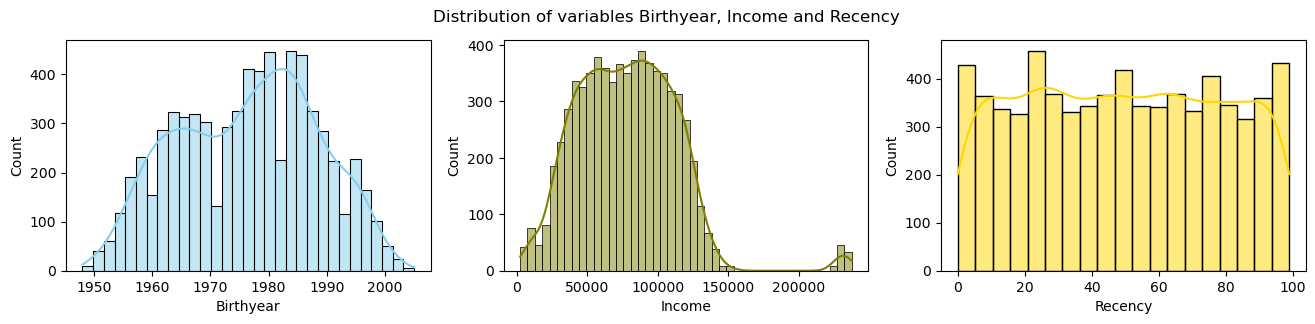

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(16,3))
fig.suptitle('Distribution of variables Birthyear, Income and Recency')

sns.histplot(data=df, x="Birthyear", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Income", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="Recency", kde=True, color="gold", ax=axs[2])

<AxesSubplot:xlabel='MntAdditionalRequests', ylabel='Count'>

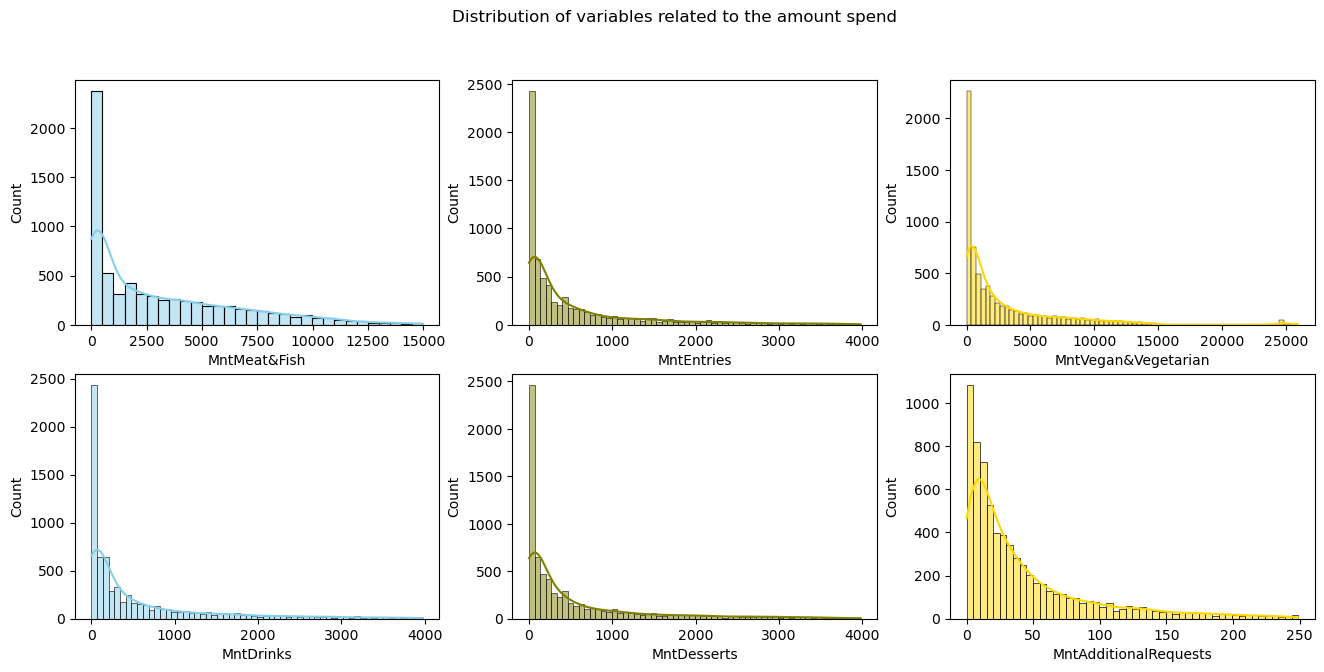

In [16]:
fig2, axs = plt.subplots(2, 3, figsize=(16,7))
fig2.suptitle('Distribution of variables related to the amount spend')

sns.histplot(data=df, x="MntMeat&Fish", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="MntEntries", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=df, x="MntVegan&Vegetarian", kde=True, color="gold", ax=axs[0,2])
sns.histplot(data=df, x="MntDrinks", kde=True, color="skyblue", ax=axs[1,0])
sns.histplot(data=df, x="MntDesserts", kde=True, color="olive", ax=axs[1,1])
sns.histplot(data=df, x="MntAdditionalRequests", kde=True, color="gold", ax=axs[1,2])

<AxesSubplot:xlabel='NumAppVisitsMonth', ylabel='Count'>

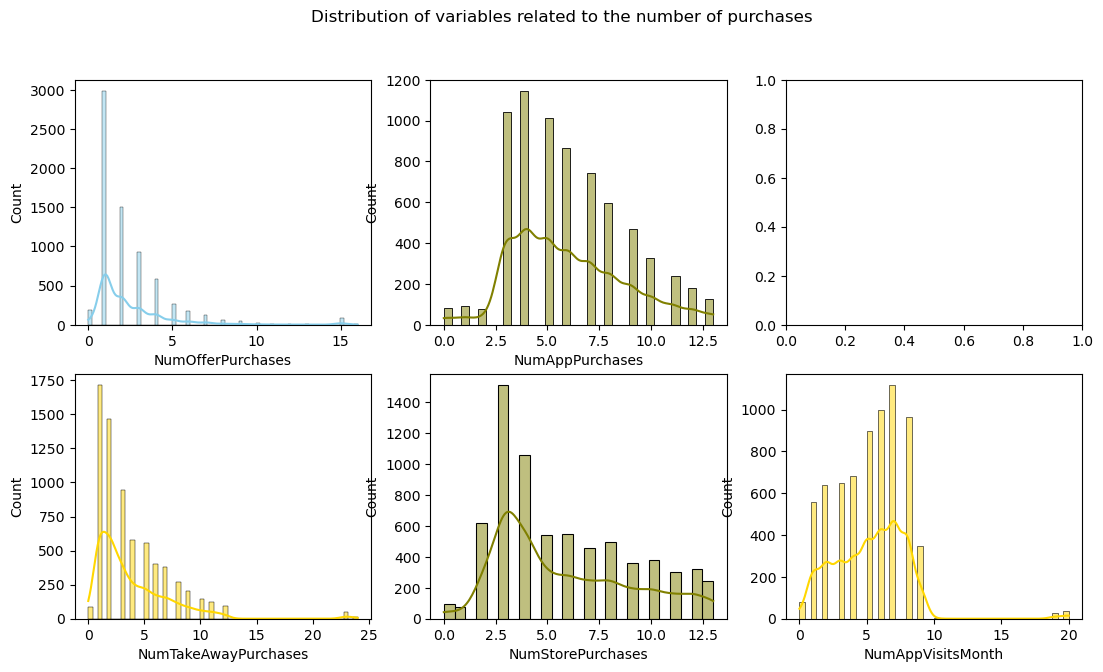

In [17]:
fig3, axs = plt.subplots(2, 3, figsize=(13,7))
fig3.suptitle('Distribution of variables related to the number of purchases')

sns.histplot(data=df, x="NumOfferPurchases", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="NumAppPurchases", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=df, x="NumTakeAwayPurchases", kde=True, color="gold", ax=axs[1,0])
sns.histplot(data=df, x="NumStorePurchases", kde=True, color="olive", ax=axs[1,1])
sns.histplot(data=df, x="NumAppVisitsMonth", kde=True, color="gold", ax=axs[1,2])

Text(0.5, 0.98, 'Spearman correlation between numerical variables')

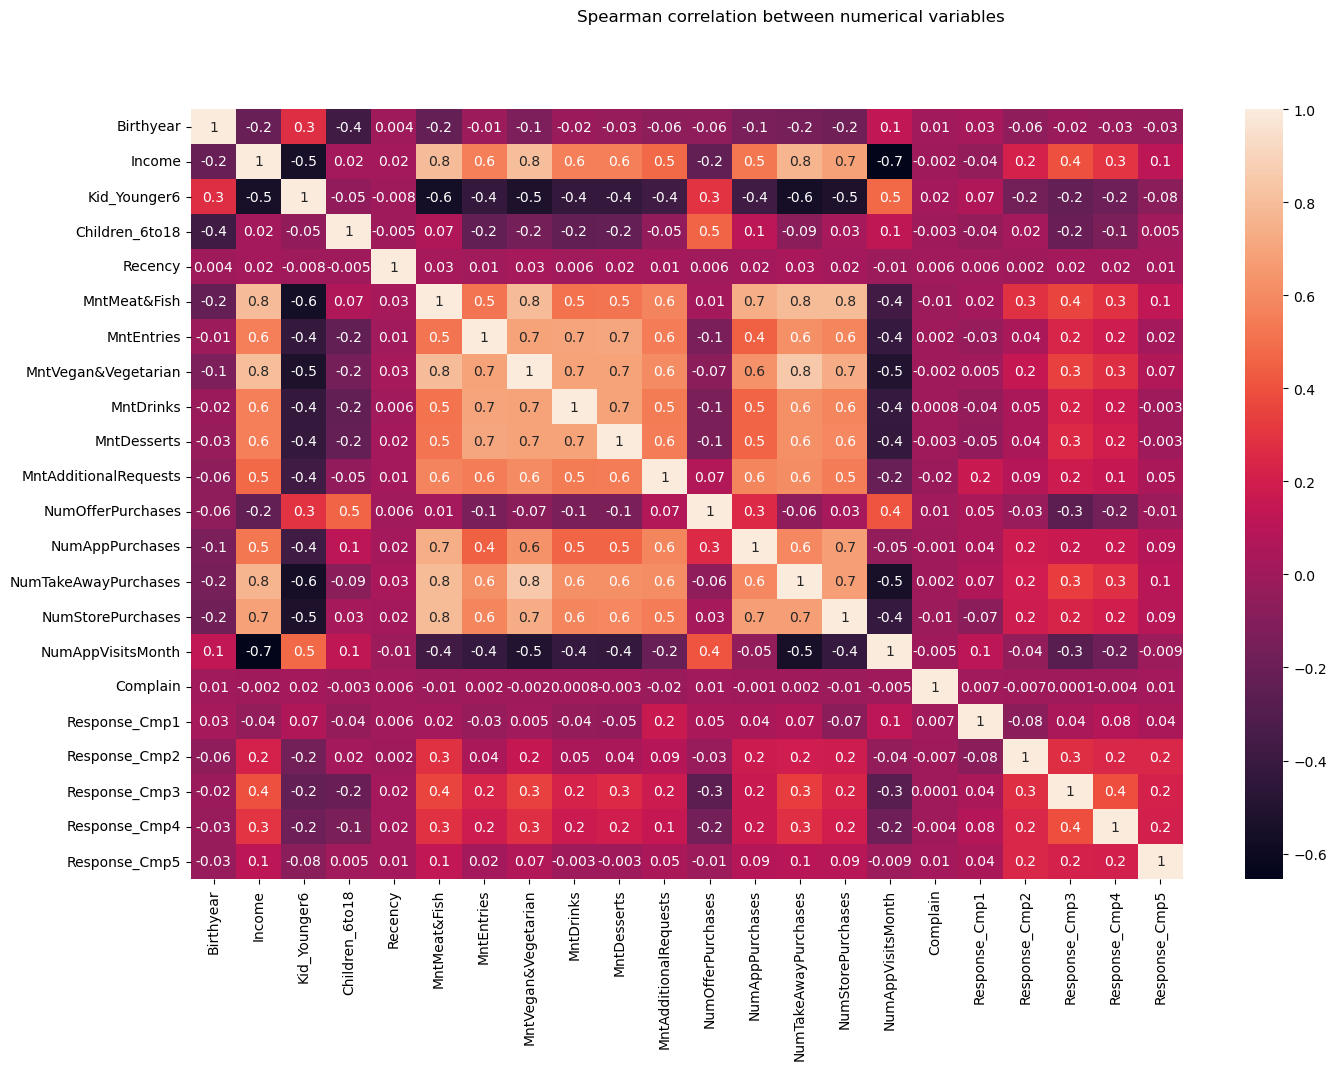

In [18]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')
figure.suptitle('Spearman correlation between numerical variables')

## 2.2. Categorical Variables

In [19]:
df.describe(include = ['O'])

# Name: there are customers that have the same name

# Education: there are 9 levels to describe the education of the customers -> check if its possible to agregate

# Marital_Status: there are 10 levels to describe the marital status of the customers -> check if its possible to agregate

# Date_Adherence

Name   Education Marital_Status       Date_Adherence
count                7000        6986           7000                 7000
unique               6241           9             10                  701
top     Mr. Stewart Grant  Graduation        Married  2020-09-19 00:00:00
freq                    3        3497           2830                   23

In [20]:
# detailed view of Education
df['Education'].value_counts()

# Labels that have the same meaning are written in different ways (e.g. Master and master)
# There are to many labels to describe Education (e.g. its dificult to distinct graduation and master)

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Education'>

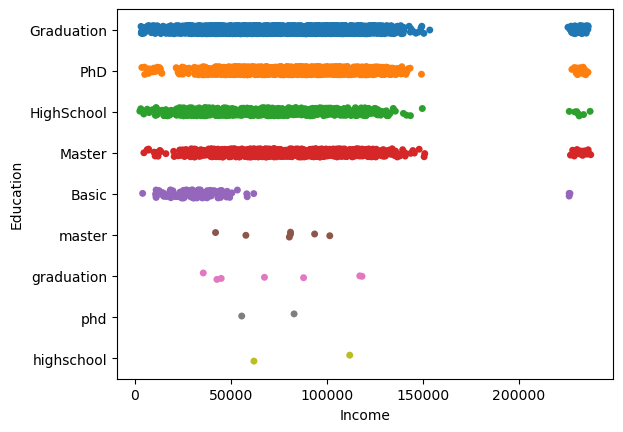

In [21]:
sns.stripplot(x = 'Income', y = 'Education', data = df)

In [22]:
# detailed view of Marital_status
df['Marital_Status'].value_counts()

# Labels that have the same meaning are written in different ways (e.g. Married and married)
# There are to many labels to describe Marital status (e.g. its dificult to distinct Marriedn and Together)

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Marital_Status'>

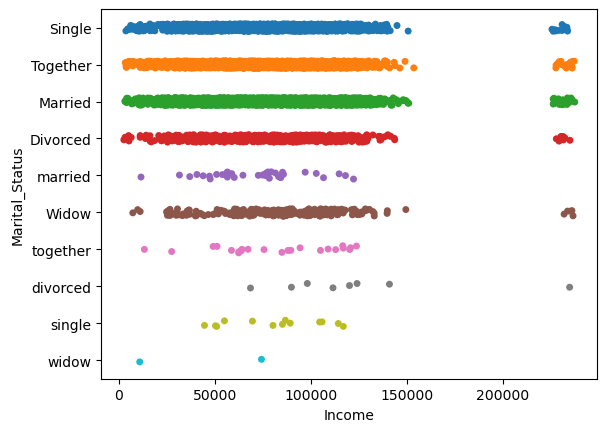

In [23]:
sns.stripplot(x = 'Income', y = 'Marital_Status', data = df)

# 3. Data Cleaning

## 3.1. Missing values and correcting labels

In [24]:
df.isna().any()

# Fill missing values:
# Education (but first correct the labels)
# Recency
# MntDrinks

Name                     False
Birthyear                False
Education                 True
Marital_Status           False
Income                   False
Kid_Younger6             False
Children_6to18           False
Date_Adherence           False
Recency                   True
MntMeat&Fish             False
MntEntries               False
MntVegan&Vegetarian      False
MntDrinks                 True
MntDesserts              False
MntAdditionalRequests    False
NumOfferPurchases        False
NumAppPurchases          False
NumTakeAwayPurchases     False
NumStorePurchases        False
NumAppVisitsMonth        False
Complain                 False
Response_Cmp1            False
Response_Cmp2            False
Response_Cmp3            False
Response_Cmp4            False
Response_Cmp5            False
dtype: bool

In [25]:
# all labels in Education with Capital letter 
df['Education'] = df['Education'].str.capitalize() 
df['Education'].value_counts()

Graduation    3504
Phd           1496
Master        1142
Highschool     665
Basic          179
Name: Education, dtype: int64

In [26]:
# Fill the missing value in Education, MntDrinks and Recency with the respective mode
df.fillna({'Education': df['Education'].mode()[0]}, inplace = True)
df.fillna({'MntDrinks': df['MntDrinks'].mode()[0]}, inplace = True)
df.fillna({'Recency': df['Recency'].mode()[0]}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              7000 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                7000 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              7000 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

In [27]:
#Binary column that shows if customer has Higher Education = 1 or Low Education = 0

df['Higher_Educ'] = np.where((df['Education']=='Graduation')|
                               (df['Education']=='Master')|
                               (df['Education']=='PhD'),1,0)
df.drop('Education', axis = 1, inplace = True)
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974       Together  114297.0   
29888         Mr. Gavin Morrison       1960       Together  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967       Together   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18       Date_Adherence  Recency  \
CustomerID                                                               
14594                  0               0  2021-01-09 00:00:00     43.0   
19070                  0               0  2021-04-10 00:00:00     74.0   
29888                  0               0  2022-01-12 00:00:00     85.0   
12221                  1               1  2021-10-12 00:00:00     25.0   
21107                  0               0  2020-12-11 00:00:00     64.0   
...                  ...             ...                  ...      ...   
30686                  0               0  2021-12-08 00:00:00     66.0   
17210                  0               0  2020-09-12 00:00:00      8.0   
29186                  0               1  2021-12-15 00:00:00     30.0   
23312                  1               0  2020-11-12 00:00:00      8.0   
15581                  0               0  2021-02-04 00:00:00     80.0   

            MntMeat&Fish  MntEntries  ...  NumTakeAwayPurchases  \
CustomerID                            ...                         
14594             4640.0        3380  ...                     7   
19070             7080.0        3680  ...                     9   
29888             4130.0         380  ...                     5   
12221             3590.0           0  ...                     3   
21107             5390.0        1126  ...                     7   
...                  ...         ...  ...                   ...   
30686             9090.0         260  ...                     6   
17210             5870.0        1020  ...                     7   
29186              540.0           0  ...                     1   
23312               80.0         120  ...                     1   
15581             7280.0         422  ...                    12   

            NumStorePurchases  NumAppVisitsMonth  Complain  Response_Cmp1  \
CustomerID                                                                  
14594                       7                  4         0              0   
19070                      12                  2         0              0   
29888                       7                  1         0              0   
12221                       8                  5         0              0   
21107                       8                  5         0              1   
...                       ...                ...       ...            ...   
30686                      11                  2         0              0   
17210                       7                  2         0              0   
29186                       4                  6         0              0   
23312                       3                  8         0              0   
15581                      11                  2         0              0   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID                                                               
14594                   1              0              0              0   
19070                   0       

In [28]:
# all labels in Marital_Status with Capital letter 
df['Marital_Status'] = df['Marital_Status'].str.capitalize() 
df['Marital_Status'].value_counts()

Married     2866
Together    1706
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

In [29]:
# 'Together'='Married'
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'].value_counts()

Married     4572
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

In [30]:
# Replace the invalid date with the day before
df.loc[df['Date_Adherence'] == '02/29/2022', 'Date_Adherence'] = '02/28/2022'

In [31]:
# Convert the 'Date_Adherence' column to datetime format, replacing the date in 29/02/2022 with the day before
df['Date_Adherence'] = pd.to_datetime(df['Date_Adherence'], errors='coerce')
invalid_date_mask = df['Date_Adherence'].isnull()
df.loc[invalid_date_mask, 'Date_Adherence'] = pd.Timestamp('2022-02-28') - pd.Timedelta(days=1)

## 3.2. Check Outliers

<AxesSubplot:xlabel='Income'>

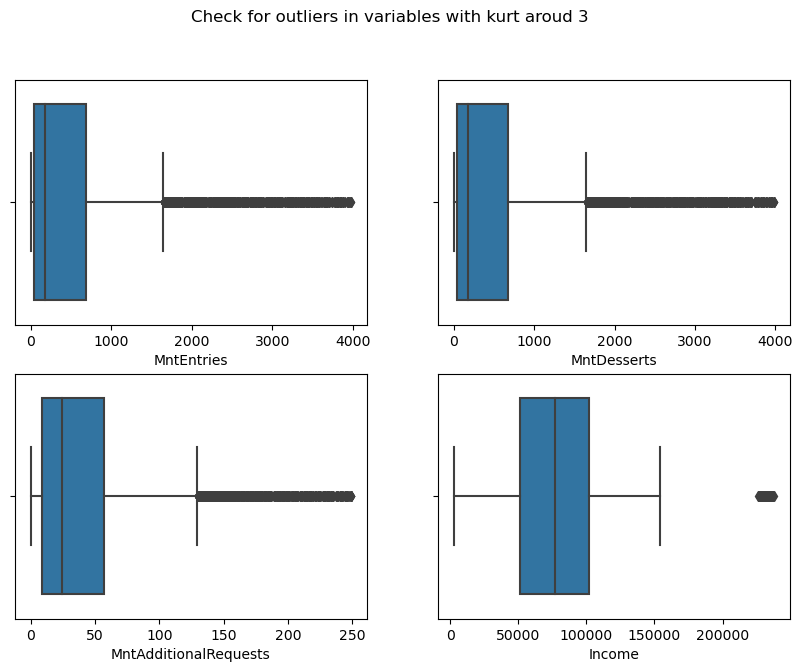

In [32]:
fig1_outl, axs = plt.subplots(2, 2, figsize=(10,7))
fig1_outl.suptitle('Check for outliers in variables with kurt aroud 3')

sns.boxplot(data=df, x="MntEntries", ax=axs[0,0])
sns.boxplot(data=df, x="MntDesserts", ax=axs[0,1])
sns.boxplot(data=df, x="MntAdditionalRequests", ax=axs[1,0])
sns.boxplot(data=df, x="Income", ax=axs[1,1])

<AxesSubplot:xlabel='NumTakeAwayPurchases'>

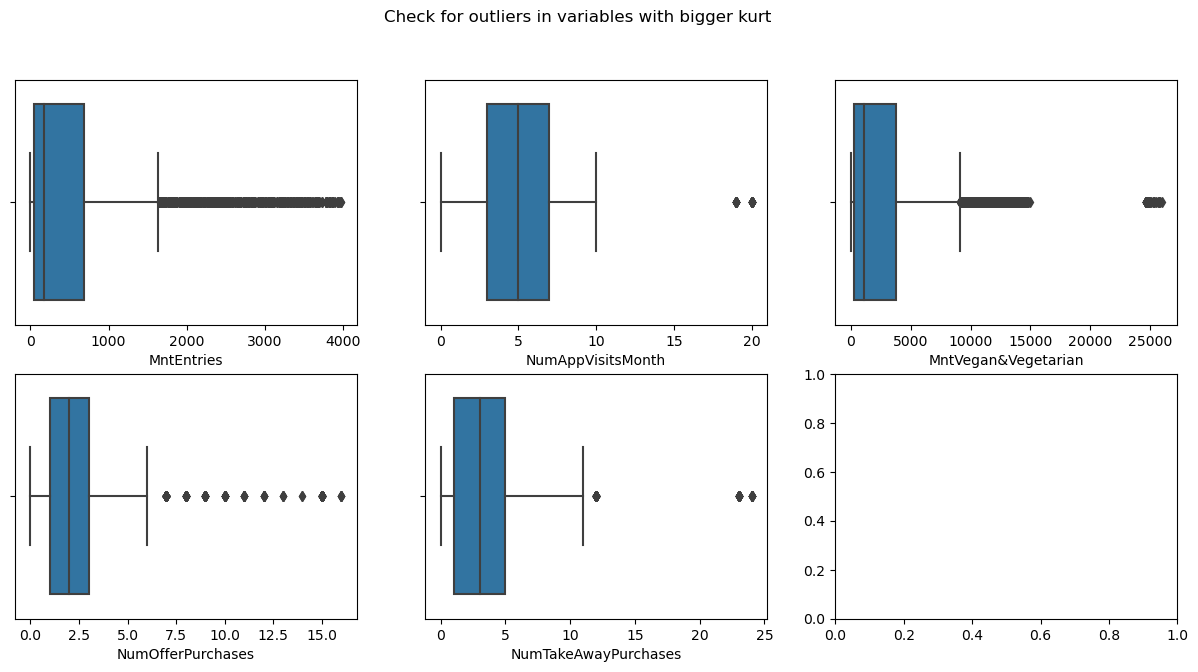

In [33]:
fig1_outl, axs = plt.subplots(2, 3, figsize=(15,7))
fig1_outl.suptitle('Check for outliers in variables with bigger kurt')

sns.boxplot(data=df, x="MntEntries", ax=axs[0,0])
sns.boxplot(data=df, x="NumAppVisitsMonth", ax=axs[0,1])
sns.boxplot(data=df, x="MntVegan&Vegetarian", ax=axs[0,2])
sns.boxplot(data=df, x="NumOfferPurchases", ax=axs[1,0])
sns.boxplot(data=df, x="NumTakeAwayPurchases", ax=axs[1,1])

In [34]:
# Get a better view for the possible outliers

# df[df["NumAppVisitsMonth"]>15] # -> 64 rows
# df[df["NumTakeAwayPurchases"]>15] # -> 61 rows
# df[df["MntVegan&Vegetarian"]>20000] # -> 63 rows
# df[df["Income"]>150000] # -> 90 rows

#total: 278 rows -> 4% of our data

In [35]:
# Apply clipping to the outliers in Income
upper_limit = df["Income"].quantile(0.97)
df["Income"] = np.where(df["Income"]> upper_limit, upper_limit,
                        df["Income"])

In [36]:
# Remove the outliers in NumAppVisitsMonth, NumTakeAwayPurchases and MntVegan&Vegetarian
df.drop(df[df["NumAppVisitsMonth"] > 15].index, inplace = True)
df.drop(df[df["NumTakeAwayPurchases"] > 15].index, inplace = True)
df.drop(df[df["MntVegan&Vegetarian"] > 20000].index, inplace = True)
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18 Date_Adherence  Recency  \
CustomerID                                                         
14594                  0               0     2021-01-09     43.0   
19070                  0               0     2021-04-10     74.0   
29888                  0               0     2022-01-12     85.0   
12221                  1               1     2021-10-12     25.0   
21107                  0               0     2020-12-11     64.0   
...                  ...             ...            ...      ...   
30686                  0               0     2021-12-08     66.0   
17210                  0               0     2020-09-12      8.0   
29186                  0               1     2021-12-15     30.0   
23312                  1               0     2020-11-12      8.0   
15581                  0               0     2021-02-04     80.0   

            MntMeat&Fish  MntEntries  ...  NumTakeAwayPurchases  \
CustomerID                            ...                         
14594             4640.0        3380  ...                     7   
19070             7080.0        3680  ...                     9   
29888             4130.0         380  ...                     5   
12221             3590.0           0  ...                     3   
21107             5390.0        1126  ...                     7   
...                  ...         ...  ...                   ...   
30686             9090.0         260  ...                     6   
17210             5870.0        1020  ...                     7   
29186              540.0           0  ...                     1   
23312               80.0         120  ...                     1   
15581             7280.0         422  ...                    12   

            NumStorePurchases  NumAppVisitsMonth  Complain  Response_Cmp1  \
CustomerID                                                                  
14594                       7                  4         0              0   
19070                      12                  2         0              0   
29888                       7                  1         0              0   
12221                       8                  5         0              0   
21107                       8                  5         0              1   
...                       ...                ...       ...            ...   
30686                      11                  2         0              0   
17210                       7                  2         0              0   
29186                       4                  6         0              0   
23312                       3                  8         0              0   
15581                      11                  2         0              0   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID                                                               
14594                   1              0              0              0   
19070                   0              0              0              0   
29888                   0           

## 3.3. Create new variables

In [37]:
# New variables called MntAll that represents the amount spent in total

df['MntAll'] = df[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests']].sum(axis=1)
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18 Date_Adherence  Recency  \
CustomerID                                                         
14594                  0               0     2021-01-09     43.0   
19070                  0               0     2021-04-10     74.0   
29888                  0               0     2022-01-12     85.0   
12221                  1               1     2021-10-12     25.0   
21107                  0               0     2020-12-11     64.0   
...                  ...             ...            ...      ...   
30686                  0               0     2021-12-08     66.0   
17210                  0               0     2020-09-12      8.0   
29186                  0               1     2021-12-15     30.0   
23312                  1               0     2020-11-12      8.0   
15581                  0               0     2021-02-04     80.0   

            MntMeat&Fish  MntEntries  ...  NumStorePurchases  \
CustomerID                            ...                      
14594             4640.0        3380  ...                  7   
19070             7080.0        3680  ...                 12   
29888             4130.0         380  ...                  7   
12221             3590.0           0  ...                  8   
21107             5390.0        1126  ...                  8   
...                  ...         ...  ...                ...   
30686             9090.0         260  ...                 11   
17210             5870.0        1020  ...                  7   
29186              540.0           0  ...                  4   
23312               80.0         120  ...                  3   
15581             7280.0         422  ...                 11   

            NumAppVisitsMonth  Complain  Response_Cmp1  Response_Cmp2  \
CustomerID                                                              
14594                       4         0              0              1   
19070                       2         0              0              0   
29888                       1         0              0              0   
12221                       5         0              0              0   
21107                       5         0              1              0   
...                       ...       ...            ...            ...   
30686                       2         0              0              0   
17210                       2         0              0              0   
29186                       6         0              0              0   
23312                       8         0              0              0   
15581                       2         0              0              0   

            Response_Cmp3  Response_Cmp4  Response_Cmp5  Higher_Educ   MntAll  
CustomerID                                                                     
14594                   0              0              0            1  16676.0  
19070                   0              0              0            1  21486.0  
29888                   0              0              0            0  13448.0  
12221                  

In [38]:
#New variable NumTotalPurchases.
df['NumTotalPurchases'] = df['AvgSpendingPerVisit'] = df['NumOfferPurchases'] + df['NumAppPurchases'] + df['NumTakeAwayPurchases'] + df['NumStorePurchases']
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18 Date_Adherence  Recency  \
CustomerID                                                         
14594                  0               0     2021-01-09     43.0   
19070                  0               0     2021-04-10     74.0   
29888                  0               0     2022-01-12     85.0   
12221                  1               1     2021-10-12     25.0   
21107                  0               0     2020-12-11     64.0   
...                  ...             ...            ...      ...   
30686                  0               0     2021-12-08     66.0   
17210                  0               0     2020-09-12      8.0   
29186                  0               1     2021-12-15     30.0   
23312                  1               0     2020-11-12      8.0   
15581                  0               0     2021-02-04     80.0   

            MntMeat&Fish  MntEntries  ...  Complain  Response_Cmp1  \
CustomerID                            ...                            
14594             4640.0        3380  ...         0              0   
19070             7080.0        3680  ...         0              0   
29888             4130.0         380  ...         0              0   
12221             3590.0           0  ...         0              0   
21107             5390.0        1126  ...         0              1   
...                  ...         ...  ...       ...            ...   
30686             9090.0         260  ...         0              0   
17210             5870.0        1020  ...         0              0   
29186              540.0           0  ...         0              0   
23312               80.0         120  ...         0              0   
15581             7280.0         422  ...         0              0   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID                                                               
14594                   1              0              0              0   
19070                   0              0              0              0   
29888                   0              0              0              0   
12221                   0              0              0              0   
21107                   0              1              0              0   
...                   ...            ...            ...            ...   
30686                   0              0              0              0   
17210                   0              0              0              0   
29186                   0              0              0              0   
23312                   0              0              0              0   
15581                   0              1              1              0   

            Higher_Educ   MntAll  NumTotalPurchases  AvgSpendingPerVisit  
CustomerID                                                                
14594                 1  16676.0                 26                   26  
19070                 1  21486.0                 27                   27  
29888                 0  13448.0

In [39]:
#Some customers don't have any type of Purchase registed. So we passed the 0's to 1's assuming this is a typo and that they indeed purchased at least 1 time
df.loc[df['NumTotalPurchases'] == 0, 'NumTotalPurchases'] = 1

In [40]:
#New variable called Average Spending per visit. 
df['AvgSpendingPerVisit'] = df['MntAll'] / (df['NumTotalPurchases'])
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18 Date_Adherence  Recency  \
CustomerID                                                         
14594                  0               0     2021-01-09     43.0   
19070                  0               0     2021-04-10     74.0   
29888                  0               0     2022-01-12     85.0   
12221                  1               1     2021-10-12     25.0   
21107                  0               0     2020-12-11     64.0   
...                  ...             ...            ...      ...   
30686                  0               0     2021-12-08     66.0   
17210                  0               0     2020-09-12      8.0   
29186                  0               1     2021-12-15     30.0   
23312                  1               0     2020-11-12      8.0   
15581                  0               0     2021-02-04     80.0   

            MntMeat&Fish  MntEntries  ...  Complain  Response_Cmp1  \
CustomerID                            ...                            
14594             4640.0        3380  ...         0              0   
19070             7080.0        3680  ...         0              0   
29888             4130.0         380  ...         0              0   
12221             3590.0           0  ...         0              0   
21107             5390.0        1126  ...         0              1   
...                  ...         ...  ...       ...            ...   
30686             9090.0         260  ...         0              0   
17210             5870.0        1020  ...         0              0   
29186              540.0           0  ...         0              0   
23312               80.0         120  ...         0              0   
15581             7280.0         422  ...         0              0   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID                                                               
14594                   1              0              0              0   
19070                   0              0              0              0   
29888                   0              0              0              0   
12221                   0              0              0              0   
21107                   0              1              0              0   
...                   ...            ...            ...            ...   
30686                   0              0              0              0   
17210                   0              0              0              0   
29186                   0              0              0              0   
23312                   0              0              0              0   
15581                   0              1              1              0   

            Higher_Educ   MntAll  NumTotalPurchases  AvgSpendingPerVisit  
CustomerID                                                                
14594                 1  16676.0                 26           641.384615  
19070                 1  21486.0                 27           795.777778  
29888                 0  13448.0

In [41]:
df['AvgSpendingPerVisit'] = df['AvgSpendingPerVisit'].round(0)
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18 Date_Adherence  Recency  \
CustomerID                                                         
14594                  0               0     2021-01-09     43.0   
19070                  0               0     2021-04-10     74.0   
29888                  0               0     2022-01-12     85.0   
12221                  1               1     2021-10-12     25.0   
21107                  0               0     2020-12-11     64.0   
...                  ...             ...            ...      ...   
30686                  0               0     2021-12-08     66.0   
17210                  0               0     2020-09-12      8.0   
29186                  0               1     2021-12-15     30.0   
23312                  1               0     2020-11-12      8.0   
15581                  0               0     2021-02-04     80.0   

            MntMeat&Fish  MntEntries  ...  Complain  Response_Cmp1  \
CustomerID                            ...                            
14594             4640.0        3380  ...         0              0   
19070             7080.0        3680  ...         0              0   
29888             4130.0         380  ...         0              0   
12221             3590.0           0  ...         0              0   
21107             5390.0        1126  ...         0              1   
...                  ...         ...  ...       ...            ...   
30686             9090.0         260  ...         0              0   
17210             5870.0        1020  ...         0              0   
29186              540.0           0  ...         0              0   
23312               80.0         120  ...         0              0   
15581             7280.0         422  ...         0              0   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID                                                               
14594                   1              0              0              0   
19070                   0              0              0              0   
29888                   0              0              0              0   
12221                   0              0              0              0   
21107                   0              1              0              0   
...                   ...            ...            ...            ...   
30686                   0              0              0              0   
17210                   0              0              0              0   
29186                   0              0              0              0   
23312                   0              0              0              0   
15581                   0              1              1              0   

            Higher_Educ   MntAll  NumTotalPurchases  AvgSpendingPerVisit  
CustomerID                                                                
14594                 1  16676.0                 26                641.0  
19070                 1  21486.0                 27                796.0  
29888                 0  13448.0

In [42]:
df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

            Kid_Younger6  Children_6to18 Date_Adherence  Recency  \
CustomerID                                                         
14594                  0               0     2021-01-09     43.0   
19070                  0               0     2021-04-10     74.0   
29888                  0               0     2022-01-12     85.0   
12221                  1               1     2021-10-12     25.0   
21107                  0               0     2020-12-11     64.0   
...                  ...             ...            ...      ...   
30686                  0               0     2021-12-08     66.0   
17210                  0               0     2020-09-12      8.0   
29186                  0               1     2021-12-15     30.0   
23312                  1               0     2020-11-12      8.0   
15581                  0               0     2021-02-04     80.0   

            MntMeat&Fish  MntEntries  ...  Complain  Response_Cmp1  \
CustomerID                            ...                            
14594             4640.0        3380  ...         0              0   
19070             7080.0        3680  ...         0              0   
29888             4130.0         380  ...         0              0   
12221             3590.0           0  ...         0              0   
21107             5390.0        1126  ...         0              1   
...                  ...         ...  ...       ...            ...   
30686             9090.0         260  ...         0              0   
17210             5870.0        1020  ...         0              0   
29186              540.0           0  ...         0              0   
23312               80.0         120  ...         0              0   
15581             7280.0         422  ...         0              0   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID                                                               
14594                   1              0              0              0   
19070                   0              0              0              0   
29888                   0              0              0              0   
12221                   0              0              0              0   
21107                   0              1              0              0   
...                   ...            ...            ...            ...   
30686                   0              0              0              0   
17210                   0              0              0              0   
29186                   0              0              0              0   
23312                   0              0              0              0   
15581                   0              1              1              0   

            Higher_Educ   MntAll  NumTotalPurchases  AvgSpendingPerVisit  
CustomerID                                                                
14594                 1  16676.0                 26                641.0  
19070                 1  21486.0                 27                796.0  
29888                 0  13448.0

<AxesSubplot:xlabel='Income', ylabel='MntAll'>

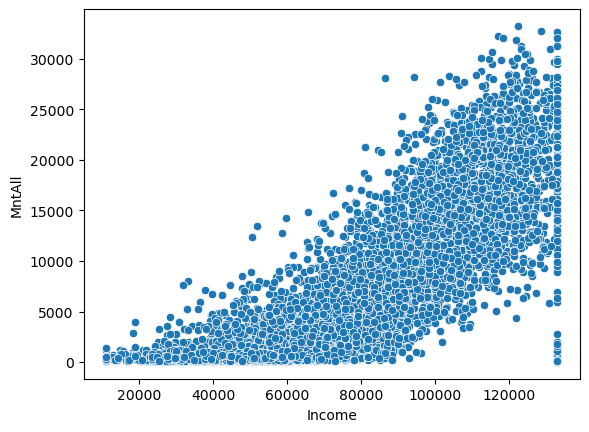

In [43]:
sns.scatterplot(data = df, x = 'Income', y= 'MntAll')

In [44]:
# New variables called Dependents that represents the total number of dependents (Kids younger6 + Children 6 to 18)

df['Dependents'] = df[['Kid_Younger6', 'Children_6to18']].sum(axis=1)

# Remove the old columns
df.drop('Kid_Younger6', axis = 1, inplace = True)
df.drop('Children_6to18', axis = 1, inplace = True)

df

Name  Birthyear Marital_Status    Income  \
CustomerID                                                             
14594            Miss Leah Lewis       1981         Single  113947.0   
19070           Miss Grace Black       1974        Married  114297.0   
29888         Mr. Gavin Morrison       1960        Married  115476.0   
12221            Mr. Ryan Glover       1980        Married  101172.0   
21107          Mr. Paul Anderson       1971         Single  123128.0   
...                          ...        ...            ...       ...   
30686            Mr. John Hughes       1994       Divorced   98968.0   
17210        Mr. Brandon Simpson       1985       Divorced  109977.0   
29186       Mr. Thomas Churchill       1967        Married   56039.0   
23312         Miss Angela Murray       1989         Single   44867.0   
15581          Miss Diana Taylor       1960         Single  124379.0   

           Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
CustomerID                                                     
14594          2021-01-09     43.0        4640.0        3380   
19070          2021-04-10     74.0        7080.0        3680   
29888          2022-01-12     85.0        4130.0         380   
12221          2021-10-12     25.0        3590.0           0   
21107          2020-12-11     64.0        5390.0        1126   
...                   ...      ...           ...         ...   
30686          2021-12-08     66.0        9090.0         260   
17210          2020-09-12      8.0        5870.0        1020   
29186          2021-12-15     30.0         540.0           0   
23312          2020-11-12      8.0          80.0         120   
15581          2021-02-04     80.0        7280.0         422   

            MntVegan&Vegetarian  MntDrinks  ...  Response_Cmp1  Response_Cmp2  \
CustomerID                                  ...                                 
14594                    5700.0     2240.0  ...              0              1   
19070                    7620.0     1840.0  ...              0              0   
29888                    4890.0     3640.0  ...              0              0   
12221                    1770.0       80.0  ...              0              0   
21107                    9495.0      656.0  ...              1              0   
...                         ...        ...  ...            ...            ...   
30686                    6015.0      260.0  ...              0              0   
17210                   13470.0     3800.0  ...              0              0   
29186                     135.0        0.0  ...              0              0   
23312                     210.0      120.0  ...              0              0   
15581                    1692.0     3760.0  ...              0              0   

            Response_Cmp3  Response_Cmp4  Response_Cmp5  Higher_Educ   MntAll  \
CustomerID                                                                      
14594                   0              0              0            1  16676.0   
19070                   0              0              0            1  21486.0   
29888                   0              0              0            0  13448.0   
12221                   0              0              0            1   5634.0   
21107                   1              0              0            0  17303.0   
...                   ...            ...            ...          ...      ...   
30686                   0              0              0            0  15665.0   
17210                   0              0              0            1  24246.0   
29186                   0              0              0            0    680.0   
23312                   0              0              0            1    647.0   
15581                   1              1              0            1  15269.0   

            NumTotalPurchases  AvgSpendingPerVisit  Dependents  
CustomerID                                                      
14594               

In [45]:
df.groupby('Dependents')['MntAll'].mean()

Dependents
0    14244.968913
1     5222.085560
2     2994.558612
3     2604.797902
4     4577.285714
Name: MntAll, dtype: float64

In [46]:
# New variable called Age that represent the age of the customer
df['Age'] = date.today().year - df['Birthyear']

#Remove the old column
df.drop('Birthyear', axis = 1, inplace = True)

df

Name Marital_Status    Income Date_Adherence  \
CustomerID                                                                 
14594            Miss Leah Lewis         Single  113947.0     2021-01-09   
19070           Miss Grace Black        Married  114297.0     2021-04-10   
29888         Mr. Gavin Morrison        Married  115476.0     2022-01-12   
12221            Mr. Ryan Glover        Married  101172.0     2021-10-12   
21107          Mr. Paul Anderson         Single  123128.0     2020-12-11   
...                          ...            ...       ...            ...   
30686            Mr. John Hughes       Divorced   98968.0     2021-12-08   
17210        Mr. Brandon Simpson       Divorced  109977.0     2020-09-12   
29186       Mr. Thomas Churchill        Married   56039.0     2021-12-15   
23312         Miss Angela Murray         Single   44867.0     2020-11-12   
15581          Miss Diana Taylor         Single  124379.0     2021-02-04   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
14594          43.0        4640.0        3380               5700.0     2240.0   
19070          74.0        7080.0        3680               7620.0     1840.0   
29888          85.0        4130.0         380               4890.0     3640.0   
12221          25.0        3590.0           0               1770.0       80.0   
21107          64.0        5390.0        1126               9495.0      656.0   
...             ...           ...         ...                  ...        ...   
30686          66.0        9090.0         260               6015.0      260.0   
17210           8.0        5870.0        1020              13470.0     3800.0   
29186          30.0         540.0           0                135.0        0.0   
23312           8.0          80.0         120                210.0      120.0   
15581          80.0        7280.0         422               1692.0     3760.0   

            MntDesserts  ...  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
CustomerID               ...                                                
14594             562.0  ...              1              0              0   
19070            1220.0  ...              0              0              0   
29888             380.0  ...              0              0              0   
12221             180.0  ...              0              0              0   
21107             562.0  ...              0              1              0   
...                 ...  ...            ...            ...            ...   
30686               0.0  ...              0              0              0   
17210               0.0  ...              0              0              0   
29186               0.0  ...              0              0              0   
23312             100.0  ...              0              0              0   
15581            1880.0  ...              0              1              1   

            Response_Cmp5  Higher_Educ   MntAll  NumTotalPurchases  \
CustomerID                                                           
14594                   0            1  16676.0                 26   
19070                   0            1  21486.0                 27   
29888                   0            0  13448.0                 18   
12221                   0            1   5634.0                 24   
21107                   0            0  17303.0                 19   
...                   ...          ...      ...                ...   
30686                   0            0  15665.0                 24   
17210                   0            1  24246.0                 20   
29186                   0            0    680.0                 10   
23312                   0            1    647.0                  8   
15581                   0            1  15269.0                 30   

            AvgSpendingPerVisit  Dependents  Age  
CustomerID           

In [47]:
# Remove the column Complain
df.drop('Complain', axis = 1, inplace = True)

In [48]:
# New variable called Gender that represent the gender of the customer
df["Gender"] = "F"
df.loc[df["Name"].str.strip().str.title().str.split(" ").str.get(0) == "Mr.", "Gender"] = "M"
df["Gender"].value_counts()
df

Name Marital_Status    Income Date_Adherence  \
CustomerID                                                                 
14594            Miss Leah Lewis         Single  113947.0     2021-01-09   
19070           Miss Grace Black        Married  114297.0     2021-04-10   
29888         Mr. Gavin Morrison        Married  115476.0     2022-01-12   
12221            Mr. Ryan Glover        Married  101172.0     2021-10-12   
21107          Mr. Paul Anderson         Single  123128.0     2020-12-11   
...                          ...            ...       ...            ...   
30686            Mr. John Hughes       Divorced   98968.0     2021-12-08   
17210        Mr. Brandon Simpson       Divorced  109977.0     2020-09-12   
29186       Mr. Thomas Churchill        Married   56039.0     2021-12-15   
23312         Miss Angela Murray         Single   44867.0     2020-11-12   
15581          Miss Diana Taylor         Single  124379.0     2021-02-04   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
14594          43.0        4640.0        3380               5700.0     2240.0   
19070          74.0        7080.0        3680               7620.0     1840.0   
29888          85.0        4130.0         380               4890.0     3640.0   
12221          25.0        3590.0           0               1770.0       80.0   
21107          64.0        5390.0        1126               9495.0      656.0   
...             ...           ...         ...                  ...        ...   
30686          66.0        9090.0         260               6015.0      260.0   
17210           8.0        5870.0        1020              13470.0     3800.0   
29186          30.0         540.0           0                135.0        0.0   
23312           8.0          80.0         120                210.0      120.0   
15581          80.0        7280.0         422               1692.0     3760.0   

            MntDesserts  ...  Response_Cmp3  Response_Cmp4  Response_Cmp5  \
CustomerID               ...                                                
14594             562.0  ...              0              0              0   
19070            1220.0  ...              0              0              0   
29888             380.0  ...              0              0              0   
12221             180.0  ...              0              0              0   
21107             562.0  ...              1              0              0   
...                 ...  ...            ...            ...            ...   
30686               0.0  ...              0              0              0   
17210               0.0  ...              0              0              0   
29186               0.0  ...              0              0              0   
23312             100.0  ...              0              0              0   
15581            1880.0  ...              1              1              0   

            Higher_Educ   MntAll  NumTotalPurchases  AvgSpendingPerVisit  \
CustomerID                                                                 
14594                 1  16676.0                 26                641.0   
19070                 1  21486.0                 27                796.0   
29888                 0  13448.0                 18                747.0   
12221                 1   5634.0                 24                235.0   
21107                 0  17303.0                 19                911.0   
...                 ...      ...                ...                  ...   
30686                 0  15665.0                 24                653.0   
17210                 1  24246.0                 20               1212.0   
29186                 0    680.0                 10                 68.0   
23312                 1    647.0                  8                 81.0   
15581                 1  15269.0                 30                509.

Text(0.5, 0.98, 'Spearman correlation between numerical variables')

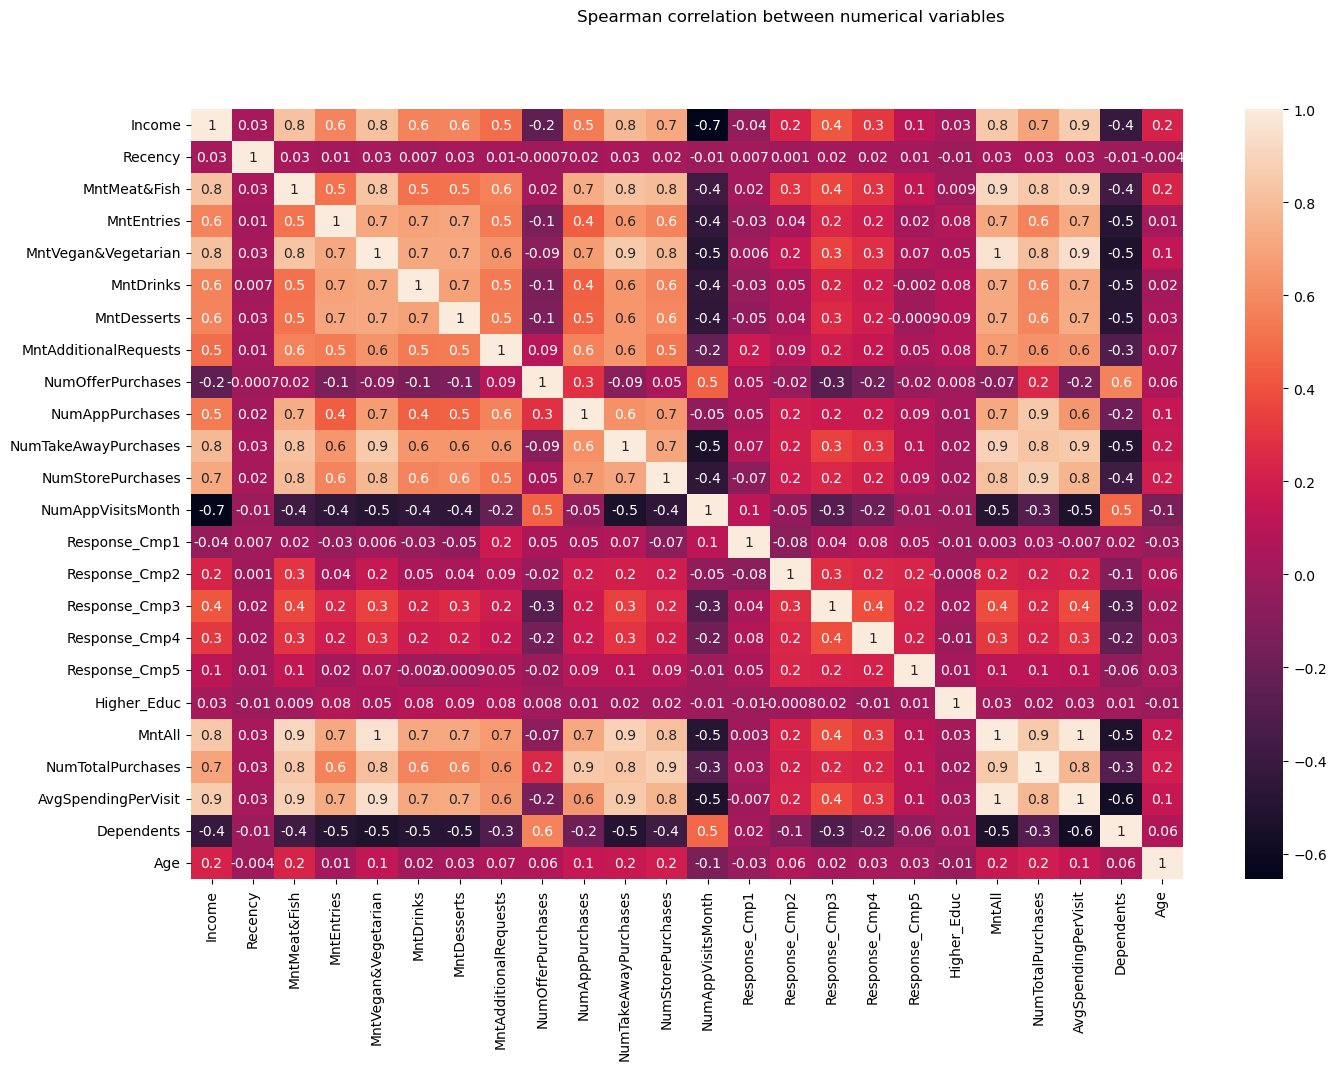

In [49]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')
figure.suptitle('Spearman correlation between numerical variables')

# 4. Modelling

## 4.1 First perspective: Customer Value

### 4.1.1 Apply k-means

In [50]:
# Customer value KMeans
df_value = df[["Income", "MntAll"]].copy()
df_value

Income   MntAll
CustomerID                   
14594       113947.0  16676.0
19070       114297.0  21486.0
29888       115476.0  13448.0
12221       101172.0   5634.0
21107       123128.0  17303.0
...              ...      ...
30686        98968.0  15665.0
17210       109977.0  24246.0
29186        56039.0    680.0
23312        44867.0    647.0
15581       124379.0  15269.0

[6865 rows x 2 columns]

In [51]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_value)
    inertias.append(model.inertia_)

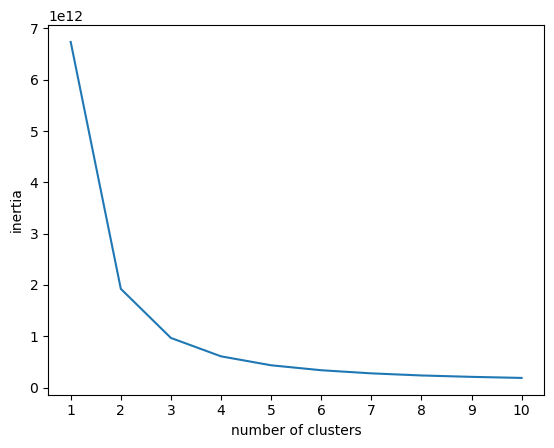

In [52]:
#Elbow method
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [53]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_value)

# Apply K-means clustering
model_k1 = KMeans(n_clusters=3, random_state = 100).fit(scaled_data)

# Add the cluster labels to the original dataset
df_value['Cluster'] = model_k1.labels_

In [54]:
df_value.tail()

Income   MntAll  Cluster
CustomerID                            
30686        98968.0  15665.0        0
17210       109977.0  24246.0        0
29186        56039.0    680.0        1
23312        44867.0    647.0        1
15581       124379.0  15269.0        0

In [55]:
df_value.groupby(['Cluster']).describe().transpose()

Cluster                   0             1              2
Income count    1824.000000   2831.000000    2210.000000
       mean   113024.860197  46856.644649   86420.569502
       std     11900.574451  14187.352270   13239.665564
       min     72278.000000  11000.000000   50519.000000
       25%    104299.000000  36574.500000   76785.750000
       50%    113502.000000  47900.000000   85012.000000
       75%    121746.500000  58152.500000   93596.750000
       max    133043.200000  74302.000000  133043.200000
MntAll count    1824.000000   2831.000000    2210.000000
       mean    18046.414474   1179.886259    6680.595792
       std      4588.813530   1295.365532    3411.139586
       min      8844.000000     66.000000      18.600000
       25%     14545.250000    419.000000    3993.750000
       50%     17385.000000    703.000000    6674.000000
       75%     20960.750000   1360.000000    9330.750000
       max     33256.000000   8955.000000   15498.000000

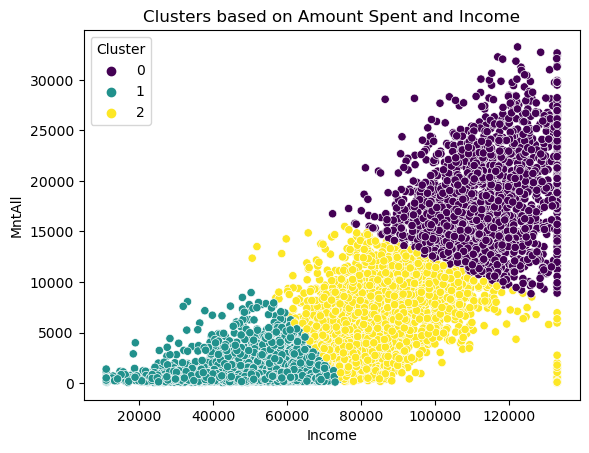

In [56]:
sns.scatterplot(x='Income', y='MntAll', data=df_value, hue='Cluster', palette='viridis')
plt.title("Clusters based on Amount Spent and Income")
plt.show()

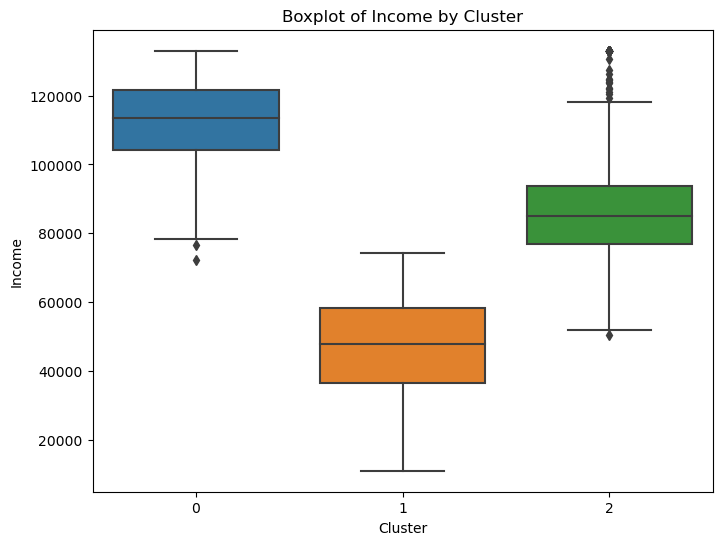

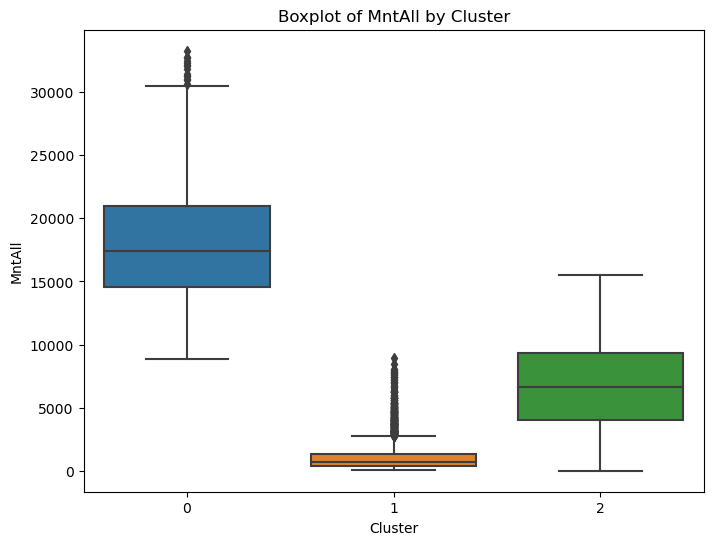

In [57]:
features = ['Income', 'MntAll']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_value)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

In [58]:
df.columns

Index(['Name', 'Marital_Status', 'Income', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Higher_Educ', 'MntAll',
       'NumTotalPurchases', 'AvgSpendingPerVisit', 'Dependents', 'Age',
       'Gender'],
      dtype='object')

### 4.1.2 Concat Product Categories

In [59]:
df_plates = df[["MntMeat&Fish", "MntEntries", "MntVegan&Vegetarian", "MntDrinks", "MntDesserts", 
                "MntAdditionalRequests"]].copy()
demo_view = pd.concat([df_value, df_plates], axis=1)
demo_view.head(3)

Income   MntAll  Cluster  MntMeat&Fish  MntEntries  \
CustomerID                                                         
14594       113947.0  16676.0        0        4640.0        3380   
19070       114297.0  21486.0        0        7080.0        3680   
29888       115476.0  13448.0        0        4130.0         380   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  MntAdditionalRequests  
CustomerID                                                                      
14594                    5700.0     2240.0        562.0                  154.0  
19070                    7620.0     1840.0       1220.0                   46.0  
29888                    4890.0     3640.0        380.0                   28.0

In [60]:
# Create a different dataframe for each cluster, composed of the individuals belonging to that cluster only. 
# For instance, cluster0_demo will be composed of the individuals belonging to cluster 0, and so on.
cluster0_demo = demo_view[demo_view.Cluster==0]
cluster1_demo = demo_view[demo_view.Cluster==1]
cluster2_demo = demo_view[demo_view.Cluster==2]

In [61]:
print('***Cluster 0 - Mean of the variables***')
print(cluster0_demo.mean())

print(' ')
print('***Cluster 1 - Mean of the variables***')
print(cluster1_demo.mean())

print(' ')
print('***Cluster 2 - Mean of the variables***')
print(cluster2_demo.mean())

***Cluster 0 - Mean of the variables***
Income                   113024.860197
MntAll                    18046.414474
Cluster                       0.000000
MntMeat&Fish               6967.444627
MntEntries                 1304.571272
MntVegan&Vegetarian        7032.855811
MntDrinks                  1337.202851
MntDesserts                1333.099781
MntAdditionalRequests        71.240132
dtype: float64
 
***Cluster 1 - Mean of the variables***
Income                   46856.644649
MntAll                    1179.886259
Cluster                      1.000000
MntMeat&Fish               423.832568
MntEntries                 119.201696
MntVegan&Vegetarian        378.708937
MntDrinks                  120.233133
MntDesserts                119.900389
MntAdditionalRequests       18.009537
dtype: float64
 
***Cluster 2 - Mean of the variables***
Income                   86420.569502
MntAll                    6680.595792
Cluster                      2.000000
MntMeat&Fish              3440.632398
M

<AxesSubplot:xlabel='Income', ylabel='MntAdditionalRequests'>

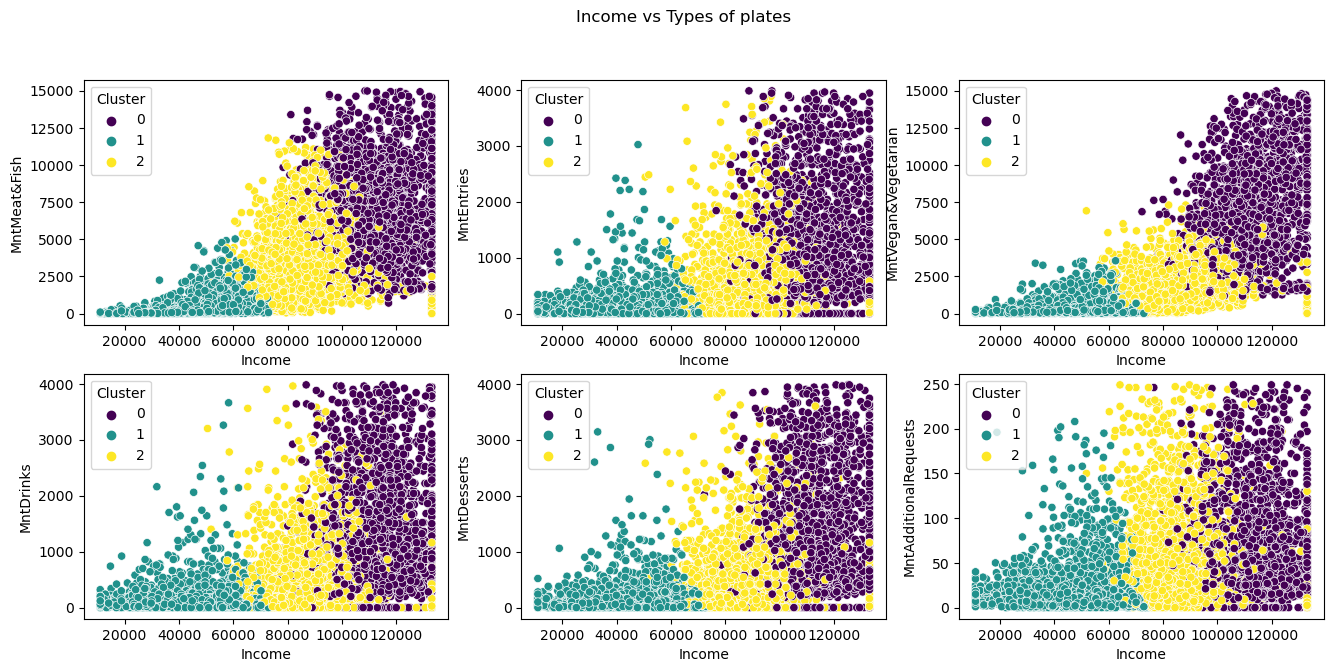

In [62]:
fig2, axs = plt.subplots(2, 3, figsize=(16,7))
fig2.suptitle('Income vs Types of plates')

sns.scatterplot(x='Income', y='MntMeat&Fish', data=demo_view, hue='Cluster', palette='viridis',ax=axs[0,0])
sns.scatterplot(x='Income', y='MntEntries', data=demo_view, hue='Cluster', palette='viridis',ax=axs[0,1])
sns.scatterplot(x='Income', y='MntVegan&Vegetarian', data=demo_view, hue='Cluster', palette='viridis',ax=axs[0,2])
sns.scatterplot(x='Income', y='MntDrinks', data=demo_view, hue='Cluster', palette='viridis',ax=axs[1,0])
sns.scatterplot(x='Income', y='MntDesserts', data=demo_view, hue='Cluster', palette='viridis',ax=axs[1,1])
sns.scatterplot(x='Income', y='MntAdditionalRequests', data=demo_view, hue='Cluster', palette='viridis',ax=axs[1,2])

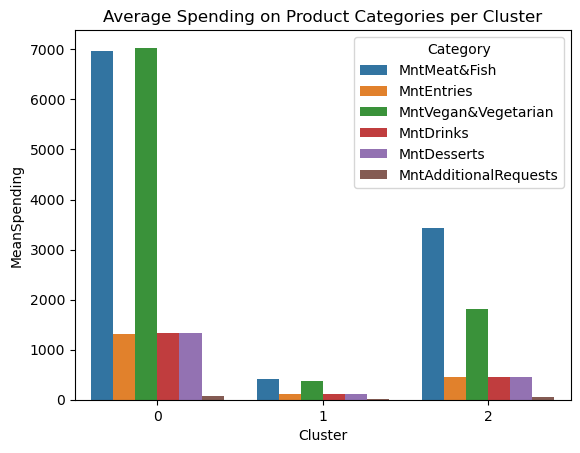

In [63]:
product_categories = ['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests']
category_means = demo_view.groupby('Cluster')[product_categories].mean().reset_index().melt(id_vars=['Cluster'], var_name='Category', value_name='MeanSpending')

sns.barplot(x='Cluster', y='MeanSpending', hue='Category', data=category_means)
plt.title('Average Spending on Product Categories per Cluster')
plt.show()

### 4.1.3 Concat demografic information

In [64]:
df_demog = df[['Gender','Higher_Educ','Marital_Status','Dependents','Age']].copy()
demo_view_final = pd.concat([demo_view, df_demog], axis=1)
demo_view_final.head(3)

Income   MntAll  Cluster  MntMeat&Fish  MntEntries  \
CustomerID                                                         
14594       113947.0  16676.0        0        4640.0        3380   
19070       114297.0  21486.0        0        7080.0        3680   
29888       115476.0  13448.0        0        4130.0         380   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                
14594                    5700.0     2240.0        562.0   
19070                    7620.0     1840.0       1220.0   
29888                    4890.0     3640.0        380.0   

            MntAdditionalRequests Gender  Higher_Educ Marital_Status  \
CustomerID                                                             
14594                       154.0      F            1         Single   
19070                        46.0      F            1        Married   
29888                        28.0      M            0        Married   

            Dependents  Age  
CustomerID                   
14594                0   42  
19070                0   49  
29888                0   63

In [65]:
cluster0_demo = demo_view_final[demo_view_final.Cluster==0]
cluster1_demo = demo_view_final[demo_view_final.Cluster==1]
cluster2_demo = demo_view_final[demo_view_final.Cluster==2]

In [66]:
print('***CLUSTER 0***')
print(' ')
print('***Descriptive Summary of Categorical variables***')
print(cluster0_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster0_demo['Higher_Educ'].value_counts()/len(cluster0_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster0_demo['Dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster0_demo['Age'].mean())

print(' ')
print('***CLUSTER 1***')
print(' ')
print('***Descriptive Summary of Categorical variables***')
print(cluster1_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster1_demo['Higher_Educ'].value_counts()/len(cluster1_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster1_demo['Dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster1_demo['Age'].mean())

print(' ')
print('***CLUSTER 2***')
print(' ')
print('***Descriptive Summary of Categorical variables***')
print(cluster2_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster2_demo['Higher_Educ'].value_counts()/len(cluster2_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster2_demo['Dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster2_demo['Age'].mean())

# there is no significant difference between clusters. Only dependents - cluster 1 have more kids than the others

***CLUSTER 0***
 
***Descriptive Summary of Categorical variables***
       Gender Marital_Status
count    1824           1824
unique      2              4
top         M        Married
freq     1333           1187
 
***Frequency for each level of education***
1    67.43
0    32.57
Name: Higher_Educ, dtype: float64
 
***Mean of Dependents***
0.31853070175438597
 
***Mean of Age***
47.927083333333336
 
***CLUSTER 1***
 
***Descriptive Summary of Categorical variables***
       Gender Marital_Status
count    2831           2831
unique      2              4
top         M        Married
freq     2075           1853
 
***Frequency for each level of education***
1    65.35
0    34.65
Name: Higher_Educ, dtype: float64
 
***Mean of Dependents***
1.2264217590957258
 
***Mean of Age***
43.434122218297425
 
***CLUSTER 2***
 
***Descriptive Summary of Categorical variables***
       Gender Marital_Status
count    2210           2210
unique      2              4
top         M        Married
freq    

In [67]:
df.columns

Index(['Name', 'Marital_Status', 'Income', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Higher_Educ', 'MntAll',
       'NumTotalPurchases', 'AvgSpendingPerVisit', 'Dependents', 'Age',
       'Gender'],
      dtype='object')

## 4.2 Second perspective: consuming behavior

### 4.2.1 Apply k-means

In [68]:
df_beha = df[[
    'Recency', "NumTotalPurchases"
]].copy()

In [69]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_beha)
    inertias.append(model.inertia_)

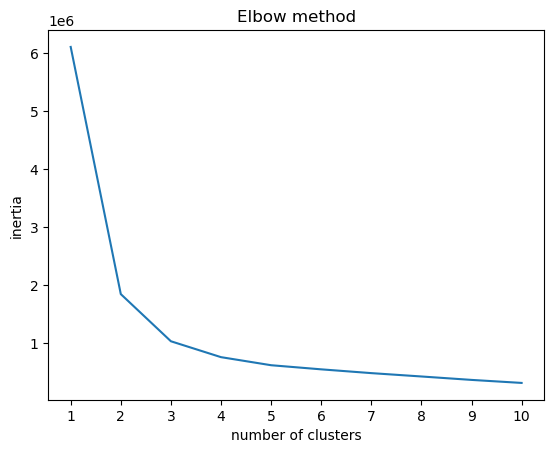

In [70]:
#Elbow method
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
plt.rcParams['figure.figsize'] = (5,5)
plt.title('Elbow method')
plt.savefig('Elbow method')
# call plt.show()
plt.show()

In [71]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_beha)

# Apply K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=100)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
df_beha["Cluster_beha"] = clusters

# Save the clustered data to a new DataFrame
clustered_df_beha = df_beha.copy()

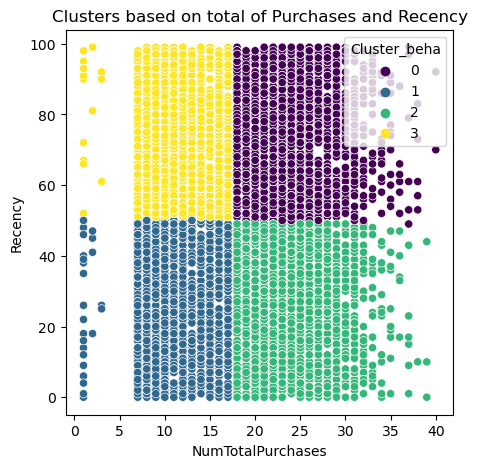

In [72]:
sns.scatterplot(x='NumTotalPurchases', y='Recency', data=clustered_df_beha, hue='Cluster_beha', palette='viridis')
plt.title("Clusters based on total of Purchases and Recency")
plt.show()

In [73]:
df_beha.groupby(['Cluster_beha']).describe().transpose()

Cluster_beha                       0            1            2            3
Recency           count  1846.000000  1730.000000  1792.000000  1497.000000
                  mean     74.555255    25.245665    24.565290    75.016032
                  std      14.496460    14.872323    14.491923    14.276060
                  min      49.000000     0.000000     0.000000    50.000000
                  25%      62.000000    12.000000    12.000000    63.000000
                  50%      74.000000    25.000000    25.000000    75.000000
                  75%      87.000000    38.000000    37.000000    88.000000
                  max      99.000000    50.000000    49.000000    99.000000
NumTotalPurchases count  1846.000000  1730.000000  1792.000000  1497.000000
                  mean     24.334778    10.995954    24.116629    11.074148
                  std       4.179905     3.254482     4.229237     3.131773
                  min      18.000000     1.000000    18.000000     1.000000
                  25%      21.000000     8.000000    21.000000     9.000000
                  50%      24.000000    11.000000    24.000000    11.000000
                  75%      27.000000    13.000000    27.000000    13.000000
                  max      40.000000    17.000000    39.000000    17.000000

### 4.2.2 Concat other variables related to consuming behavior

In [74]:
df_return = df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumOfferPurchases', 'NumAppVisitsMonth', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5']].copy()

In [75]:
demo_second_view_final = pd.concat([clustered_df_beha, df_return], axis=1)
demo_second_view_final.head(3)

Recency  NumTotalPurchases  Cluster_beha  NumAppPurchases  \
CustomerID                                                              
14594          43.0                 26             2               10   
19070          74.0                 27             0                5   
29888          85.0                 18             0                5   

            NumTakeAwayPurchases  NumStorePurchases  NumOfferPurchases  \
CustomerID                                                               
14594                          7                  7                  2   
19070                          9                 12                  1   
29888                          5                  7                  1   

            NumAppVisitsMonth  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
CustomerID                                                                   
14594                       4              0              1              0   
19070                       2              0              0              0   
29888                       1              0              0              0   

            Response_Cmp4  Response_Cmp5  
CustomerID                                
14594                   0              0  
19070                   0              0  
29888                   0              0

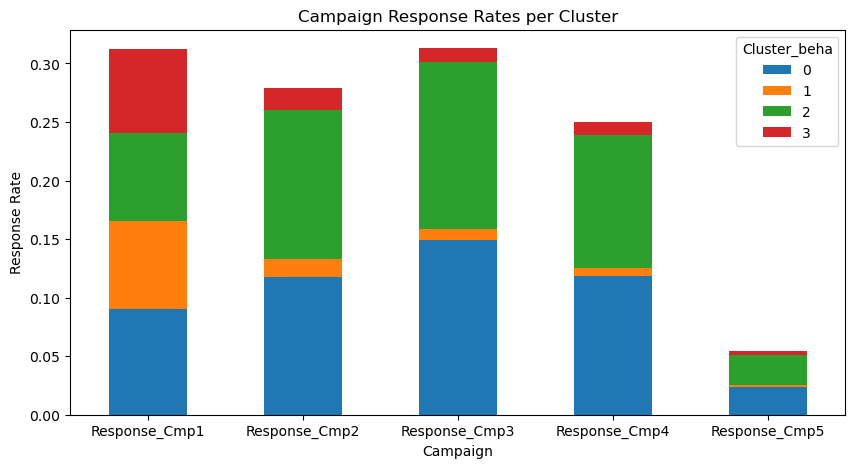

In [76]:
campaign_columns = ['Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5']
campaign_response_data = demo_second_view_final.groupby('Cluster_beha')[campaign_columns].mean().reset_index()

ax = campaign_response_data.set_index('Cluster_beha').T.plot(kind='bar', stacked=True, figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Campaign Response Rates per Cluster')
ax.set_xlabel('Campaign')
ax.set_ylabel('Response Rate')

plt.show()

In [77]:
cluster0 = demo_second_view_final[demo_second_view_final.Cluster_beha==0]
cluster1 = demo_second_view_final[demo_second_view_final.Cluster_beha==1]
cluster2 = demo_second_view_final[demo_second_view_final.Cluster_beha==2]
cluster3 = demo_second_view_final[demo_second_view_final.Cluster_beha==3]

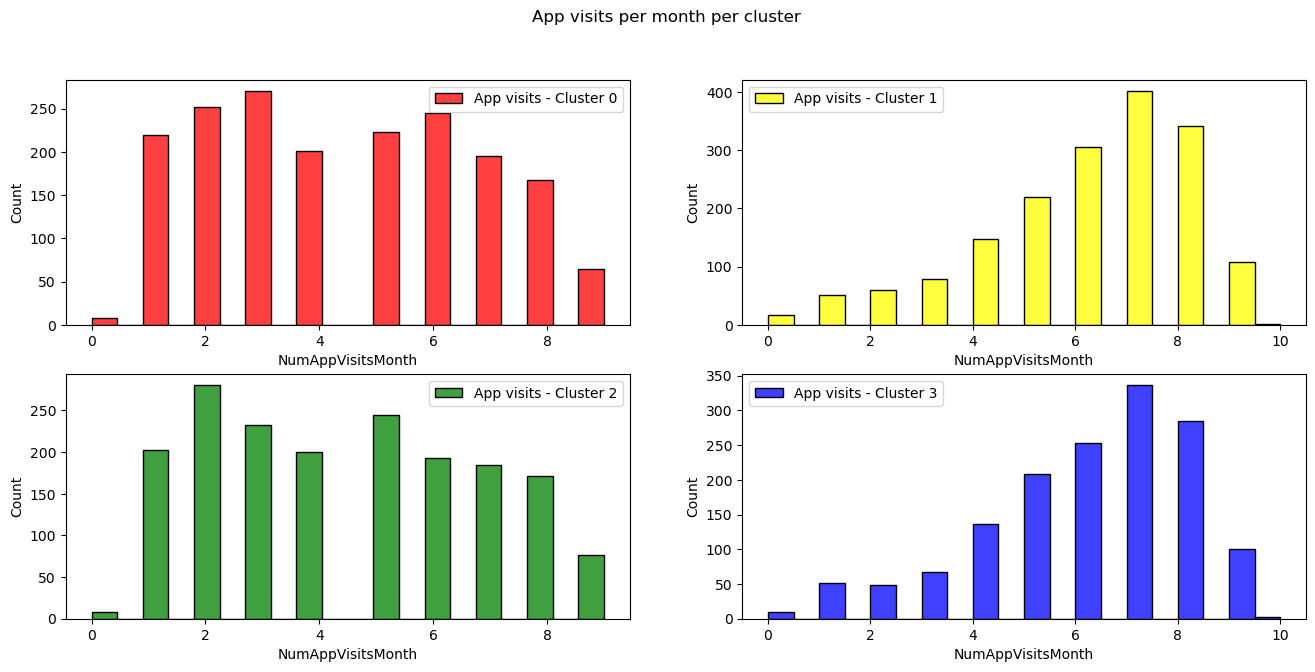

In [112]:
fig2, axs = plt.subplots(2, 2, figsize=(16,7))
fig2.suptitle('App visits per month per cluster')

sns.histplot(cluster0['NumAppVisitsMonth'], color='red', label='App visits - Cluster 0', bins=20, ax=axs[0,0])
sns.histplot(cluster1['NumAppVisitsMonth'], color='yellow', label='App visits - Cluster 1', bins=20, ax=axs[0,1])
sns.histplot(cluster2['NumAppVisitsMonth'], color='green', label='App visits - Cluster 2', bins=20, ax=axs[1,0])
sns.histplot(cluster3['NumAppVisitsMonth'], color='blue', label='App visits - Cluster 3', bins=20, ax=axs[1,1])

axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.show()

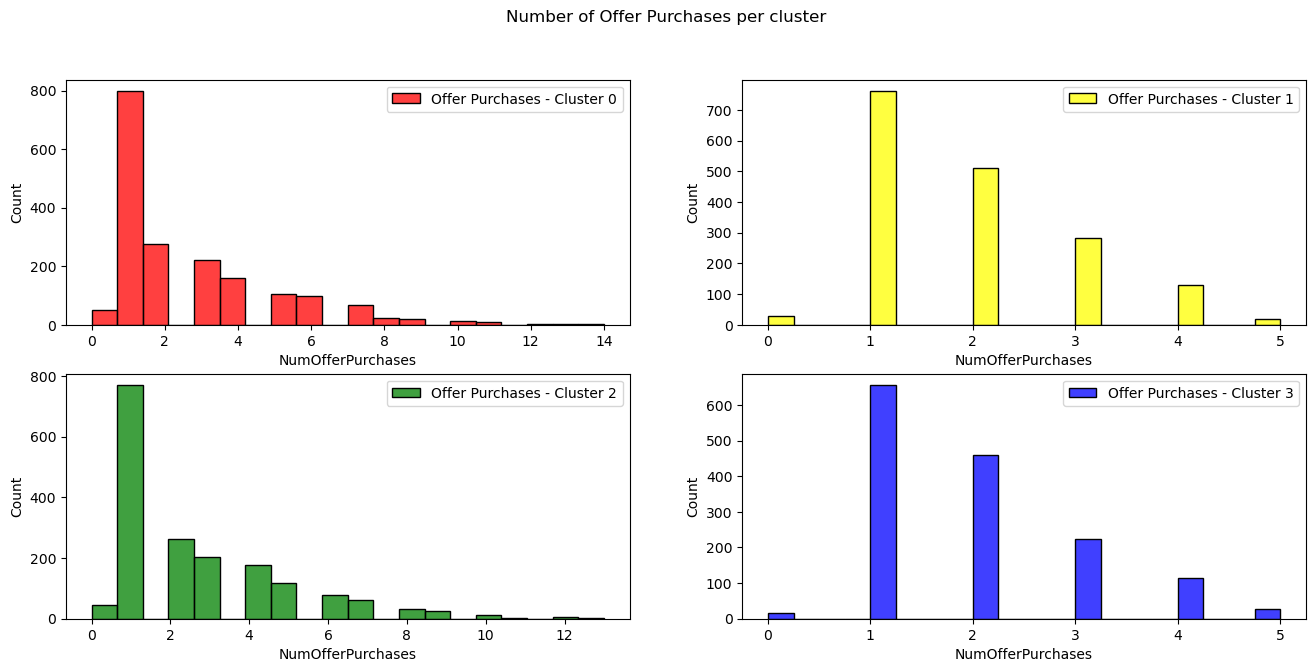

In [113]:
fig2, axs = plt.subplots(2, 2, figsize=(16,7))
fig2.suptitle('Number of Offer Purchases per cluster')

sns.histplot(cluster0['NumOfferPurchases'],color='red',label='Offer Purchases - Cluster 0', bins = 20, ax=axs[0,0])
sns.histplot(cluster1['NumOfferPurchases'],color='yellow',label='Offer Purchases - Cluster 1', bins = 20, ax=axs[0,1])
sns.histplot(cluster2['NumOfferPurchases'],color='green',label='Offer Purchases - Cluster 2', bins = 20, ax=axs[1,0])
sns.histplot(cluster3['NumOfferPurchases'],color='blue',label='Offer Purchases - Cluster 3', bins = 20, ax=axs[1,1])

axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.legend()

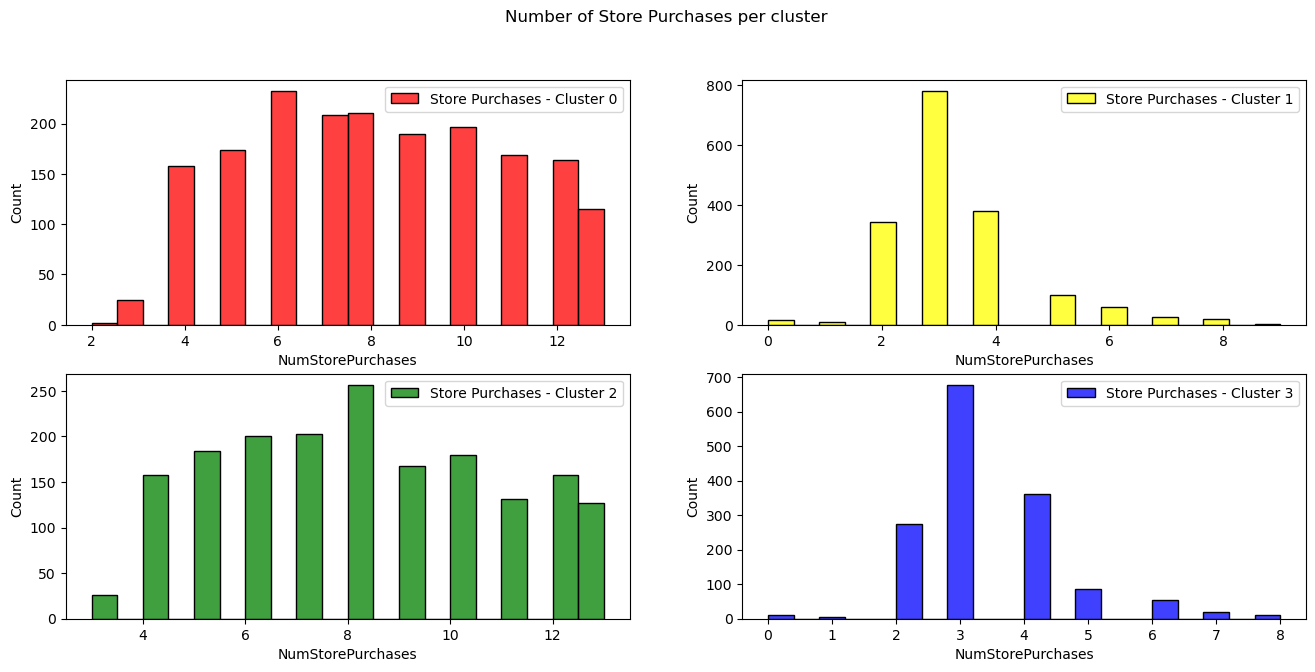

In [114]:
fig2, axs = plt.subplots(2, 2, figsize=(16,7))
fig2.suptitle('Number of Store Purchases per cluster')

sns.histplot(cluster0['NumStorePurchases'],color='red',label='Store Purchases - Cluster 0', bins = 20, ax=axs[0,0])
sns.histplot(cluster1['NumStorePurchases'],color='yellow',label='Store Purchases - Cluster 1', bins = 20, ax=axs[0,1])
sns.histplot(cluster2['NumStorePurchases'],color='green',label='Store Purchases - Cluster 2', bins = 20, ax=axs[1,0])
sns.histplot(cluster3['NumStorePurchases'],color='blue',label='Store Purchases - Cluster 3', bins = 20, ax=axs[1,1])

axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.legend()

In [81]:
final_df = pd.concat([demo_second_view_final, demo_view_final], axis = 1)
final_df.head(2)

Recency  NumTotalPurchases  Cluster_beha  NumAppPurchases  \
CustomerID                                                              
14594          43.0                 26             2               10   
19070          74.0                 27             0                5   

            NumTakeAwayPurchases  NumStorePurchases  NumOfferPurchases  \
CustomerID                                                               
14594                          7                  7                  2   
19070                          9                 12                  1   

            NumAppVisitsMonth  Response_Cmp1  Response_Cmp2  ...  MntEntries  \
CustomerID                                                   ...               
14594                       4              0              1  ...        3380   
19070                       2              0              0  ...        3680   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                
14594                    5700.0     2240.0        562.0   
19070                    7620.0     1840.0       1220.0   

            MntAdditionalRequests  Gender  Higher_Educ  Marital_Status  \
CustomerID                                                               
14594                       154.0       F            1          Single   
19070                        46.0       F            1         Married   

            Dependents  Age  
CustomerID                   
14594                0   42  
19070                0   49  

[2 rows x 27 columns]

In [82]:
final_df['concat'] = final_df['Cluster'].astype(str) + final_df['Cluster_beha'].astype(str)
final_df

Recency  NumTotalPurchases  Cluster_beha  NumAppPurchases  \
CustomerID                                                              
14594          43.0                 26             2               10   
19070          74.0                 27             0                5   
29888          85.0                 18             0                5   
12221          25.0                 24             2                8   
21107          64.0                 19             0                4   
...             ...                ...           ...              ...   
30686          66.0                 24             0                6   
17210           8.0                 20             2                5   
29186          30.0                 10             1                3   
23312           8.0                  8             1                3   
15581          80.0                 30             0                6   

            NumTakeAwayPurchases  NumStorePurchases  NumOfferPurchases  \
CustomerID                                                               
14594                          7                  7                  2   
19070                          9                 12                  1   
29888                          5                  7                  1   
12221                          3                  8                  5   
21107                          7                  8                  0   
...                          ...                ...                ...   
30686                          6                 11                  1   
17210                          7                  7                  1   
29186                          1                  4                  2   
23312                          1                  3                  1   
15581                         12                 11                  1   

            NumAppVisitsMonth  Response_Cmp1  Response_Cmp2  ...  \
CustomerID                                                   ...   
14594                       4              0              1  ...   
19070                       2              0              0  ...   
29888                       1              0              0  ...   
12221                       5              0              0  ...   
21107                       5              1              0  ...   
...                       ...            ...            ...  ...   
30686                       2              0              0  ...   
17210                       2              0              0  ...   
29186                       6              0              0  ...   
23312                       8              0              0  ...   
15581                       2              0              0  ...   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                
14594                    5700.0     2240.0        562.0   
19070                    7620.0     1840.0       1220.0   
29888                    4890.0     3640.0        380.0   
12221                    1770.0       80.0        180.0   
21107                    9495.0      656.0        562.0   
...                         ...        ...          ...   
30686                    6015.0      260.0          0.0   
17210                   13470.0     3800.0          0.0   
29186                     135.0        0.0          0.0   
23312                     210.0      120.0        100.0   
15581                    1692.0     3760.0       1880.0   

            MntAdditionalRequests  Gender  Higher_Educ  Marital_Status  \
CustomerID                                                               
14594                       154.0       F            1          Single   
19070                        46.0       F            1         Married   
29888                        28.0       M            0         Married   
12221                        14.0       M            1         Married   
21

In [83]:
final_df['concat'].value_counts()

11    1383
13    1211
00     894
22     858
20     832
02     817
21     291
23     229
10     120
12     117
03      57
01      56
Name: concat, dtype: int64

In [84]:
final_df.groupby(['concat']).mean().transpose()

concat                            00             01             02  \
Recency                    74.591723      23.160714      24.769890   
NumTotalPurchases          24.998881      16.375000      24.870257   
Cluster_beha                0.000000       1.000000       2.000000   
NumAppPurchases             7.592841       5.357143       7.662179   
NumTakeAwayPurchases        7.187919       4.678571       7.119951   
NumStorePurchases           8.648770       5.178571       8.594859   
NumOfferPurchases           1.569351       1.160714       1.493268   
NumAppVisitsMonth           3.193512       2.428571       3.111383   
Response_Cmp1               0.082774       0.035714       0.066095   
Response_Cmp2               0.143177       0.071429       0.164015   
Response_Cmp3               0.285235       0.232143       0.294982   
Response_Cmp4               0.199105       0.142857       0.211750   
Response_Cmp5               0.025727       0.017857       0.035496   
Income                 112953.402237  112233.435714  113137.444798   
MntAll                  18278.151007   17051.375000   17892.930233   
Cluster                     0.000000       0.000000       0.000000   
MntMeat&Fish             7106.787472    5994.464286    6910.944920   
MntEntries               1287.391499    1578.607143    1313.747858   
MntVegan&Vegetarian      7101.070470    6534.303571    6977.804162   
MntDrinks                1376.366890    1451.500000    1293.578947   
MntDesserts              1335.789709    1428.750000    1324.137087   
MntAdditionalRequests      70.744966      63.750000      72.717258   
Higher_Educ                 0.680089       0.714286       0.660955   
Dependents                  0.334452       0.267857       0.313341   
Age                        48.099553      46.357143      47.891065   

concat                            03            10            11  \
Recency                    75.122807     73.775000     25.362256   
NumTotalPurchases          16.105263     20.850000     10.344179   
Cluster_beha                3.000000      0.000000      1.000000   
NumAppPurchases             5.210526      7.750000      3.942878   
NumTakeAwayPurchases        4.754386      2.650000      1.432393   
NumStorePurchases           5.000000      5.116667      3.036153   
NumOfferPurchases           1.140351      5.333333      1.932755   
NumAppVisitsMonth           2.491228      7.708333      6.566161   
Response_Cmp1               0.070175      0.191667      0.085322   
Response_Cmp2               0.140351      0.016667      0.007231   
Response_Cmp3               0.263158      0.000000      0.000000   
Response_Cmp4               0.228070      0.016667      0.001446   
Response_Cmp5               0.087719      0.008333      0.000000   
Income                 113309.449123  54584.541667  45627.196674   
MntAll                  17589.333333   4276.533333    870.774403   
Cluster                     0.000000      1.000000      1.000000   
MntMeat&Fish             6547.701754   1833.750000    285.422993   
MntEntries               1173.263158    309.166667     97.541576   
MntVegan&Vegetarian      7241.842105   1400.125000    277.689805   
MntDrinks                1235.929825    303.500000    103.080260   
MntDesserts              1325.403509    372.500000     92.624729   
MntAdditionalRequests      65.192982     57.491667     14.415040   
Higher_Educ                 0.736842      0.600000      0.661605   
Dependents                  0.192982      1.275000      1.207520   
Age                        47.280702     46.133333     43.262473   

concat                           12            13            20            21  \
Recency                   24.632479     75.090834     74.628606     25.092784   
NumTotalPurchases         21.111111     10.464905     24.123798     13.058419   
Cluster_beha               2.000000      3.000000      0.000000      1.000000   
NumAppPurchases            7.837607      3.959538      8.268029      4.800687   
NumTa

# 5. PCA

In [85]:
df.columns

Index(['Name', 'Marital_Status', 'Income', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Higher_Educ', 'MntAll',
       'NumTotalPurchases', 'AvgSpendingPerVisit', 'Dependents', 'Age',
       'Gender'],
      dtype='object')

In [86]:
df_pca = df[[
    "Age", "Higher_Educ", "Income", "Marital_Status", "Recency", "MntAll", "MntMeat&Fish", "MntEntries", "MntVegan&Vegetarian", 'NumAppVisitsMonth', "MntDrinks", "MntDesserts", "MntAdditionalRequests",
    "NumOfferPurchases", "NumAppPurchases", "NumTakeAwayPurchases", "NumStorePurchases",
    "Response_Cmp1", "Response_Cmp2", "Response_Cmp3", "Response_Cmp4", "Response_Cmp5"
]].copy()

In [87]:
df_pca = pd.get_dummies(df_pca, columns=["Marital_Status"])

In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

In [89]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [90]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

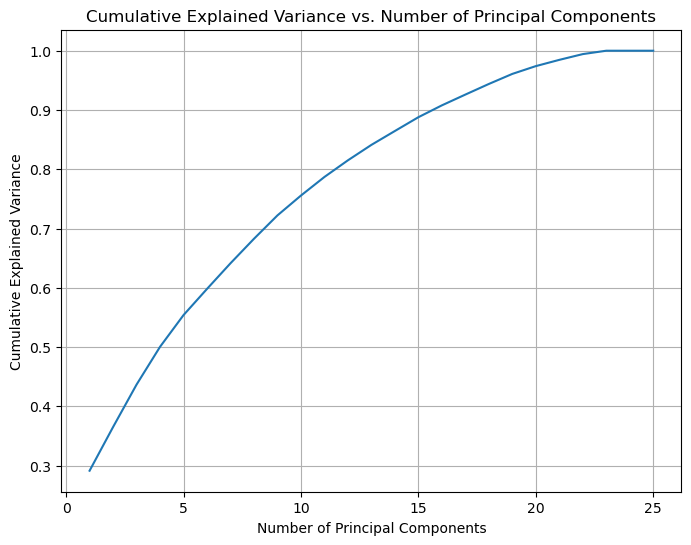

In [91]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.savefig('cumulative_explained_variance.png')
plt.show()

In [92]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=20)
principal_components = pca.fit_transform(scaled_data)

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(principal_components)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df_pca['Cluster'] = cluster_labels

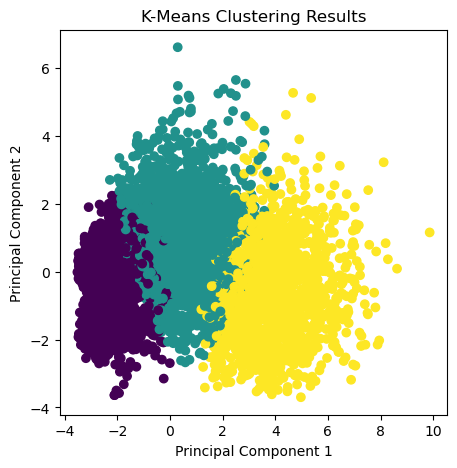

In [93]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('PCA Clusters.png')
plt.show()

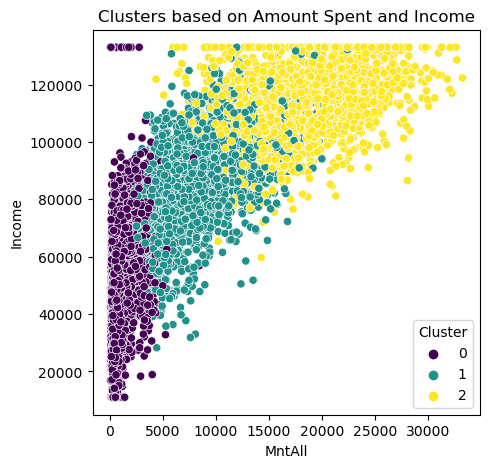

In [94]:
sns.scatterplot(x='MntAll', y='Income', data=df_pca, hue='Cluster', palette='viridis')
plt.title("Clusters based on Amount Spent and Income")
plt.savefig('Amount Spent vs Income.png')
plt.show()

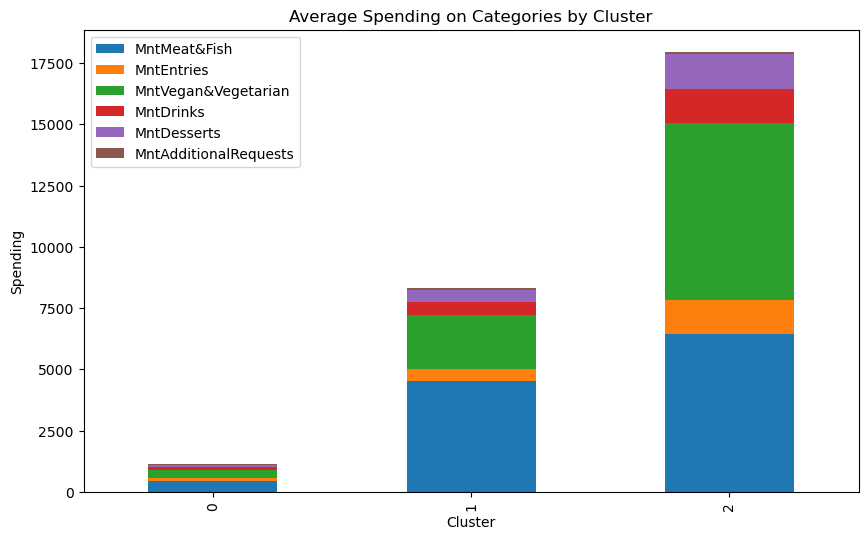

In [95]:
category_columns = ['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests']
category_summary = df_pca.groupby("Cluster")[category_columns].mean()

category_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Average Spending on Categories by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Spending")
plt.show()

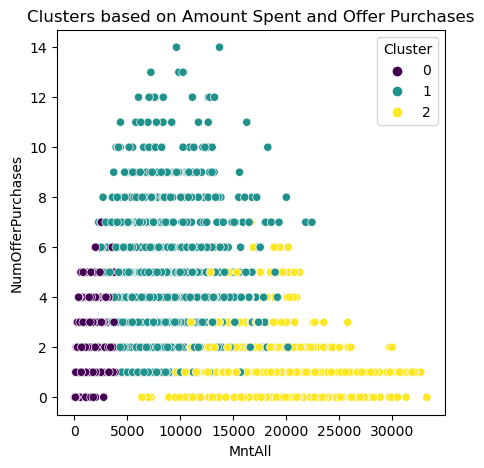

In [96]:
sns.scatterplot(x='MntAll', y='NumOfferPurchases', data=df_pca, hue='Cluster', palette='viridis')
plt.title("Clusters based on Amount Spent and Offer Purchases")
plt.show()

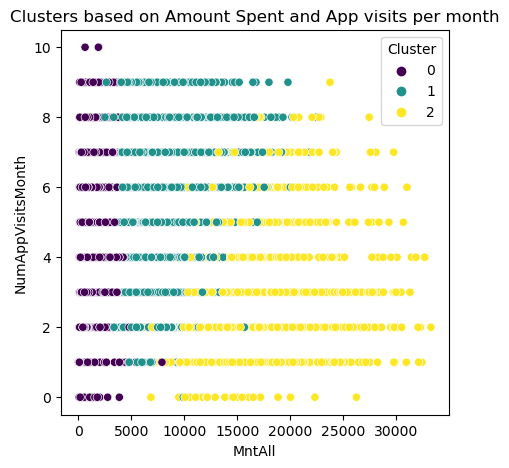

In [97]:
sns.scatterplot(x='MntAll', y='NumAppVisitsMonth', data=df_pca, hue='Cluster', palette='viridis')
plt.title("Clusters based on Amount Spent and App visits per month")
plt.show()
#Cluster 1 and 2 visit our APP a lot - Mareting Campaing

# 6. GMM

In [98]:
df_gmm = df[[
    "MntAll", "Income"
]].copy()

In [99]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_gmm)

gmm = GaussianMixture(n_components = 3).fit(scaled_data)
 
# Fit the GMM model for the dataset which expresses the dataset as a mixture of 3 Gaussian Distribution

In [100]:
# Assign a label to each sample
labels = gmm.predict(scaled_data)
df_gmm['labels']= labels
d0 = df_gmm[df_gmm['labels']== 0]
d1 = df_gmm[df_gmm['labels']== 1]
d2 = df_gmm[df_gmm['labels']== 2]

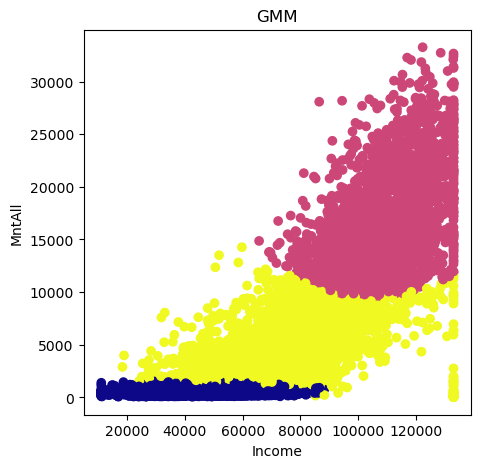

In [101]:
plt.scatter(df_gmm['Income'],df_gmm['MntAll'], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("MntAll") # Y-axis label
plt.title("GMM")
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('GMM')

# 7. DBSCAN

In [102]:
# Select only the variables we want to use in this perspective
df_bdscan = df[[
    "MntAll", "Income"
]].copy()

In [103]:
# identify the Eps to used as a paremeter in DBSCAM
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(df_bdscan) # fitting the data to the object
distances,indices=nbrs.kneighbors(df_bdscan) # finding the nearest neighbours

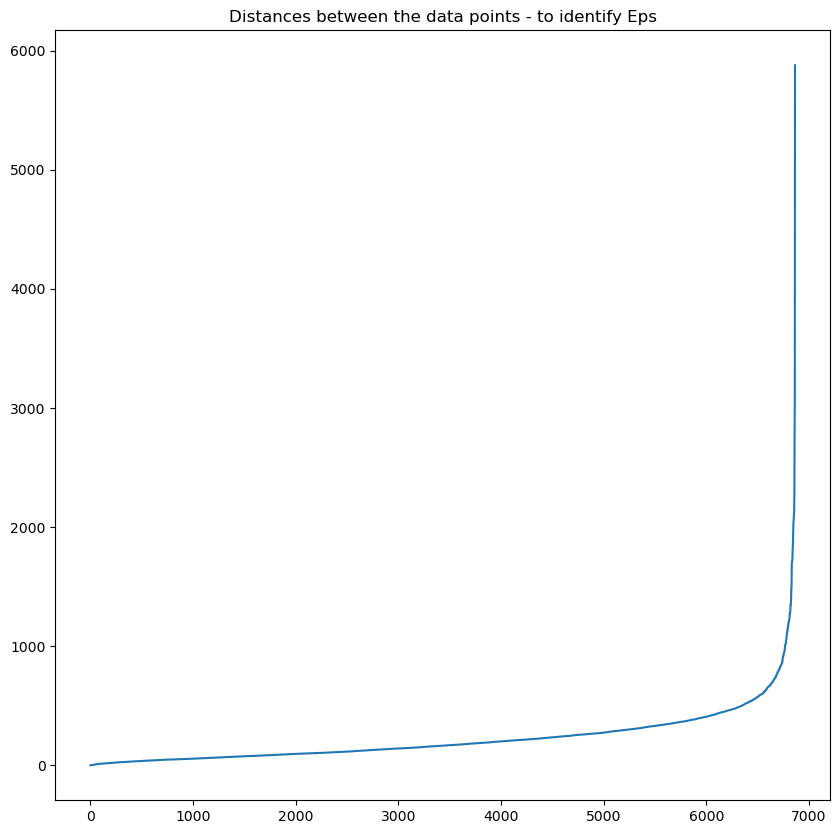

In [104]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.plot(distances) # plotting the distances
plt.title('Distances between the data points - to identify Eps')
plt.savefig('Distances between the data points - to identify Eps')
plt.show() # showing the plot

In [105]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 1000, min_samples = 4).fit(df_bdscan) # fitting the model
labels = dbscan.labels_ # getting the labels

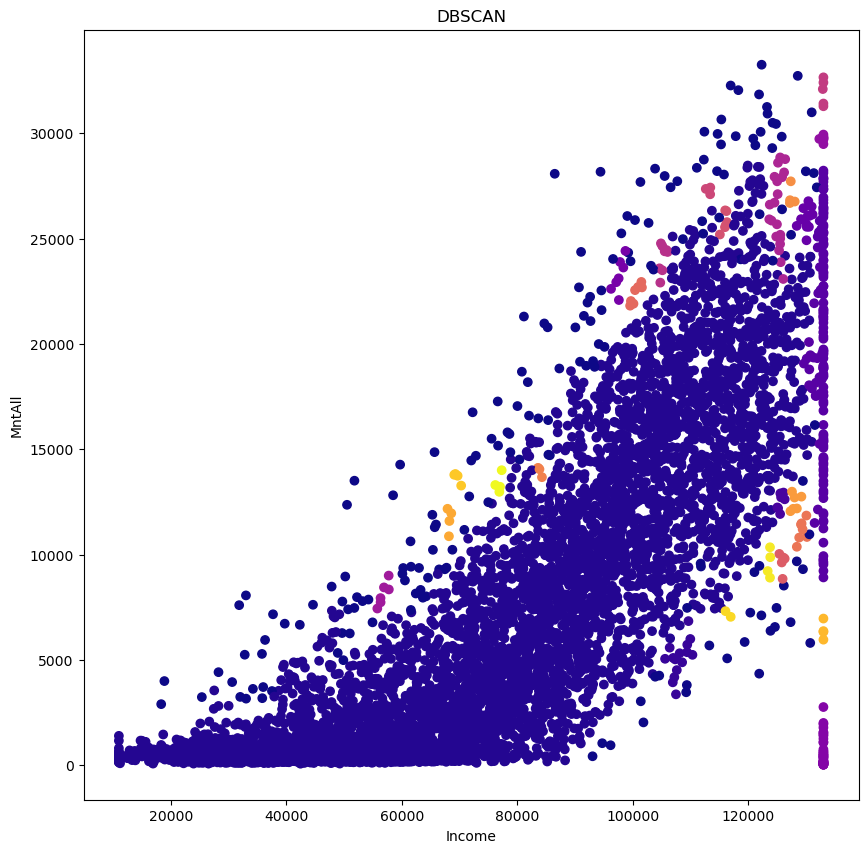

In [106]:
plt.scatter(df_bdscan['Income'],df_bdscan['MntAll'], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("MntAll") # Y-axis label
plt.rcParams['figure.figsize'] = (10,10)
plt.title("DBSCAN")
plt.savefig('DBSCAN')
plt.show() # showing the plot